In [1]:
!pip3 install decorator==5.0.9

import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import math
import os
import scipy

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from sklearn.preprocessing import Normalizer
from pathlib import Path


seed = 0
np.random.seed(seed)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Path to the target csv file. This notebook should be in the same folder as the csv-data file 11_Autonomous_Systems.csv
path = os.getcwd()
print(path)

/Users/fmd/Desktop/USI/Semester_4/Data_Analytics/Autonomous-Systems


Question 1 - What does the data look like?

In [3]:
data = pd.read_csv(path+'/11_Autonomous_Systems.csv')
data


ComputerNumber  Zeus  Hera  Poseidon  Demeter  Athena  Apollo  Artemis  \
0                 1     0     0         0        0       1       0        0   
1                 2     0     0         0        0       1       0        0   
2                 3     0     0         0        1       0       0        0   
3                 4     0     0         0        1       0       0        0   
4                 5     0     0         0        0       1       0        0   
..              ...   ...   ...       ...      ...     ...     ...      ...   
148             149     0     0         0        0       1       0        0   
149             150     0     0         0        0       0       0        0   
150             151     0     0         0        0       1       0        0   
151             152     0     0         0        0       1       0        0   
152             153     1     0         0        0       0       0        0   

     Ares  Aphrodite  ...  Hestia  Dionysus  Granite   Mica   Shale   Quartz  \
0       0          0  ...       1         0        0      0       0        0   
1       0          0  ...       1         0        0      1       0        0   
2       0          0  ...       0         0        1      0       0        0   
3       0          0  ...       0         0        1      0       0        0   
4       0          0  ...       0         0        1      0       0        0   
..    ...        ...  ...     ...       ...      ...    ...     ...      ...   
148     1          0  ...       0         0        1      0       0        0   
149     0          0  ...       0         0        0      0       0        0   
150     1          0  ...       0         0        1      0       0        0   
151     1          0  ...       0         0        1      0       0        0   
152     0          1  ...       0         0        0      0       0        0   

      Ruby   Atlas   Ryoken   Vulture  
0        0       0        0         0  
1        0       0        0         0  
2        0       0        0         0  
3        0       0        1         1  
4        0       0        0         1  
..     ...     ...      ...       ...  
148      0       0        0         1  
149      0       0        0         0  
150      0       0        0         0  
151      0       0        0         0  
152      0       0        0         0  

[153 rows x 22 columns]

In [4]:
# It makes more sense to represent the dataframe with the ComputerNumber as index and the servers as columns. 
data = pd.read_csv(path+'/11_Autonomous_Systems.csv',index_col=0)
# print(data.to_latex(index=True, columns=['Zeus', 'Hera', 'Poseidon', 'Demeter', 'Athena','Apollo', ' Vulture']))
data

Zeus  Hera  Poseidon  Demeter  Athena  Apollo  Artemis  Ares  \
ComputerNumber                                                                 
1                  0     0         0        0       1       0        0     0   
2                  0     0         0        0       1       0        0     0   
3                  0     0         0        1       0       0        0     0   
4                  0     0         0        1       0       0        0     0   
5                  0     0         0        0       1       0        0     0   
...              ...   ...       ...      ...     ...     ...      ...   ...   
149                0     0         0        0       1       0        0     1   
150                0     0         0        0       0       0        0     0   
151                0     0         0        0       1       0        0     1   
152                0     0         0        0       1       0        0     1   
153                1     0         0        0       0       0        0     0   

                Aphrodite  Hephaestus  ...  Hestia  Dionysus  Granite   Mica  \
ComputerNumber                         ...                                     
1                       0           0  ...       1         0        0      0   
2                       0           0  ...       1         0        0      1   
3                       0           0  ...       0         0        1      0   
4                       0           1  ...       0         0        1      0   
5                       0           1  ...       0         0        1      0   
...                   ...         ...  ...     ...       ...      ...    ...   
149                     0           0  ...       0         0        1      0   
150                     0           0  ...       0         0        0      0   
151                     0           0  ...       0         0        1      0   
152                     0           1  ...       0         0        1      0   
153                     1           0  ...       0         0        0      0   

                 Shale   Quartz   Ruby   Atlas   Ryoken   Vulture  
ComputerNumber                                                     
1                    0        0      0       0        0         0  
2                    0        0      0       0        0         0  
3                    0        0      0       0        0         0  
4                    0        0      0       0        1         1  
5                    0        0      0       0        0         1  
...                ...      ...    ...     ...      ...       ...  
149                  0        0      0       0        0         1  
150                  0        0      0       0        0         0  
151                  0        0      0       0        0         0  
152                  0        0      0       0        0         0  
153                  0        0      0       0        0         0  

[153 rows x 21 columns]

Question 2 - Are there any missing values in the data set? If there are not, are all values binary?

In [5]:
#Check that there aren't any missing values in the dataset and replace missing values with zeros
check=data.isnull().any().sum()
if check == 0:
    print('There are no missing values in the dataset')
else:
    data= data.replace(np.nan, 0)
    print('There were missing values in the dataset and they were replaced with zeros')



There are no missing values in the dataset


In [6]:
#Check that all values are binary
check = data.columns[data.isin([0,1]).all()]
if len(check) == data.shape[1]:
    print('All values in the columns are binary')
else:
    print('Not all values in the columns are binary')


All values in the columns are binary


Question 3 - Which are the least and most connected servers? 

In [7]:
list_of_column_names = list(data.columns)
list_of_column_names


['Zeus',
 'Hera',
 'Poseidon',
 'Demeter',
 'Athena',
 'Apollo',
 'Artemis',
 'Ares',
 'Aphrodite',
 'Hephaestus',
 'Hermes',
 'Hestia',
 'Dionysus',
 'Granite',
 ' Mica',
 ' Shale',
 ' Quartz',
 ' Ruby',
 ' Atlas',
 ' Ryoken',
 ' Vulture']

In [8]:
#Maximum number of connected computers

#total_cc represents the sum of all the rows (computers) in each server (column) the loc is compared with the maximum
total_cc = pd.DataFrame(data.loc[1:153].sum().astype(int),columns=['Total connected Computers'])

#max_cc selects (loc) all the columns with the max number
max_cc=total_cc.loc[lambda total_cc: total_cc['Total connected Computers']== total_cc.max( axis='rows')[0]]
max_cc


Total connected Computers
Granite                         69

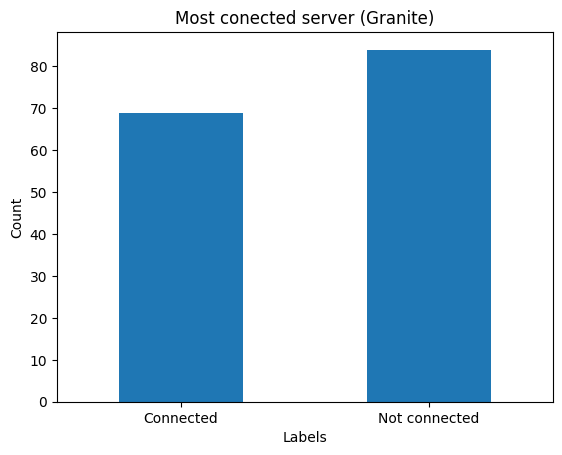

In [9]:
#Plot of bar chart representing the cell above

plt.figure()
aa=max_cc.index.values.tolist()

labels = ['Connected','Not connected']
classes = pd.value_counts(data[aa[0]], ascending=True)
classes.plot(kind = 'bar', rot=0)
plt.title('Most conected server (Granite)')
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.savefig('Images/Most_connected_server2.png')
plt.show()
plt.close()

In [10]:
#Minimum number of connected computers

#total_cc represents the sum of all the rows (computers) in each server (column) 
min_cc=total_cc.loc[lambda total_cc: total_cc['Total connected Computers']== total_cc.min( axis='rows')[0]]

#min_cc selects (loc) all the columns with the min number
min_cc




Total connected Computers
Hera                            8
Hermes                          8
 Shale                          8
 Atlas                          8

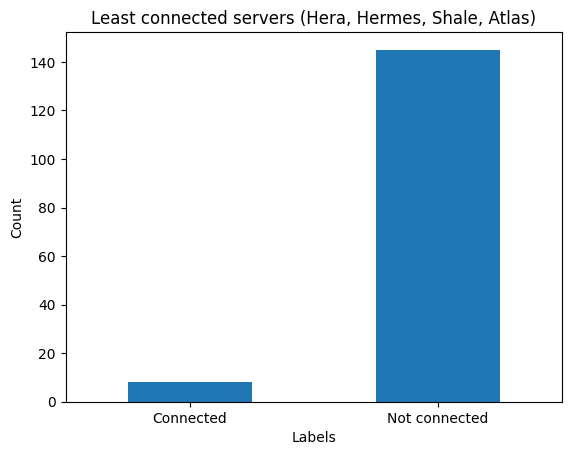

In [11]:
#Plot of bar chart representing the cell above
plt.figure()
bb=min_cc.index.values.tolist()

labels = ['Connected','Not connected']
classes2 = pd.value_counts(data[bb[0]], ascending=True)
classes2.plot(kind = 'bar', rot=0)
plt.title('Least connected servers (Hera, Hermes, Shale, Atlas)')
plt.xticks(range(2), labels)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.savefig('Images/Least_connected_server.png')
plt.show()
plt.close()

Question 4 - What is the average connections and which servers have more than the average?

In [12]:
#listing the conected computers cc and the not conected computers not_cc
cc=[]
not_cc=[]
for i in list_of_column_names:
    cc.append(len(data[data[i] == 1]))
    not_cc.append(len(data[data[i] == 0]))

#Calcualting the average of connected computers
mean_connections=np.mean(cc)
print('The average number of connections is '+ str(mean_connections))

#aa_cc selects (loc) all the columns with the above average conected computers
aa_cc=total_cc.loc[lambda total_cc: total_cc['Total connected Computers']> mean_connections]
aa_cc


The average number of connections is 19.047619047619047


Total connected Computers
Zeus                               23
Athena                             52
Ares                               46
Hephaestus                         20
Granite                            69

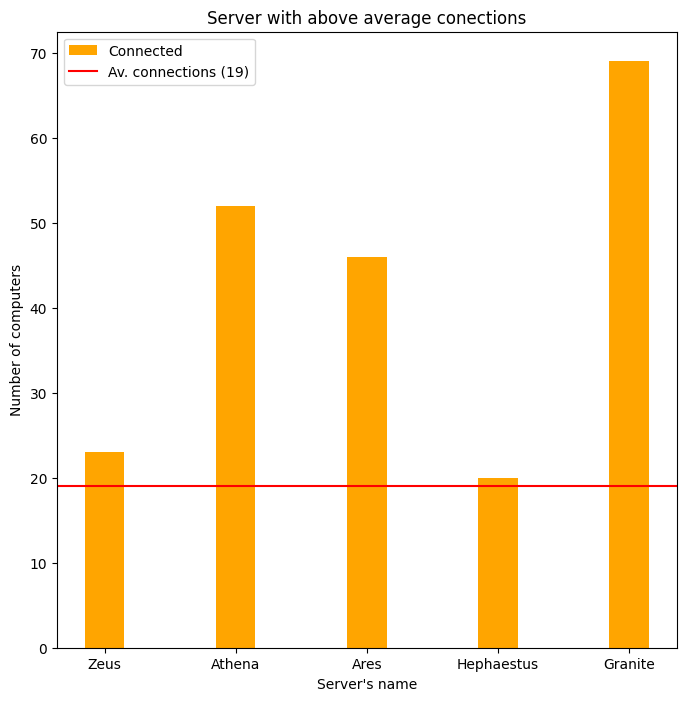

In [13]:
lst=aa_cc.index.values.tolist()
lst2=aa_cc['Total connected Computers'].to_numpy()
X_axis = np.arange(len(lst))

plt.figure(figsize=(8,8))

line1=plt.bar(X_axis, lst2 , 0.3, label = 'Connected',color='orange')
line2=plt.axhline(y=mean_connections,c='red', label= 'Av. connections (19)')

plt.xticks(X_axis, lst)
plt.xlabel("Server's name")
plt.ylabel("Number of computers")
plt.title("Server with above average conections")
# plt.legend(handles=[line1,line3,line4])
plt.legend(handles=[line1,line2])
plt.savefig('Images/Above_average.png')
plt.show()
plt.close()

Question 5 - Are there any computers that are not connected to any server? if so, which ones?

In [14]:
# New data frame based on the computerNumber with only one column representing the sum of all the rows
tot_con_to_servers=pd.DataFrame(data.sum(axis=1))
tot_con_to_servers

# Zero connections - computers (ComputerNumber) not connected to any server
zero_con=tot_con_to_servers.loc[lambda tot_con_to_servers:tot_con_to_servers[0]==0]
zero_con=zero_con.index.values.tolist()
print('Bellow are the list of computers (ComputerNumber) not connected to any server.')
print(zero_con)



Bellow are the list of computers (ComputerNumber) not connected to any server.
[34, 48, 49, 51, 72, 81, 99, 111, 115, 134, 135, 144, 148, 150]


In [15]:
# Max connections - computers (ComputerNumber) connected to multiple servers
max_con=tot_con_to_servers.loc[lambda tot_con_to_servers:tot_con_to_servers[0]==tot_con_to_servers.max( axis='rows')[0]]
max_con=max_con.index.values.tolist()
print('Bellow are the list of computers (ComputerNumber) with the maximum connections to different servers, which is '+str(tot_con_to_servers.max( axis='rows')[0])+' connections')
print(max_con)

Bellow are the list of computers (ComputerNumber) with the maximum connections to different servers, which is 7 connections
[108, 126]


Question 6 - What does the distribution look like?

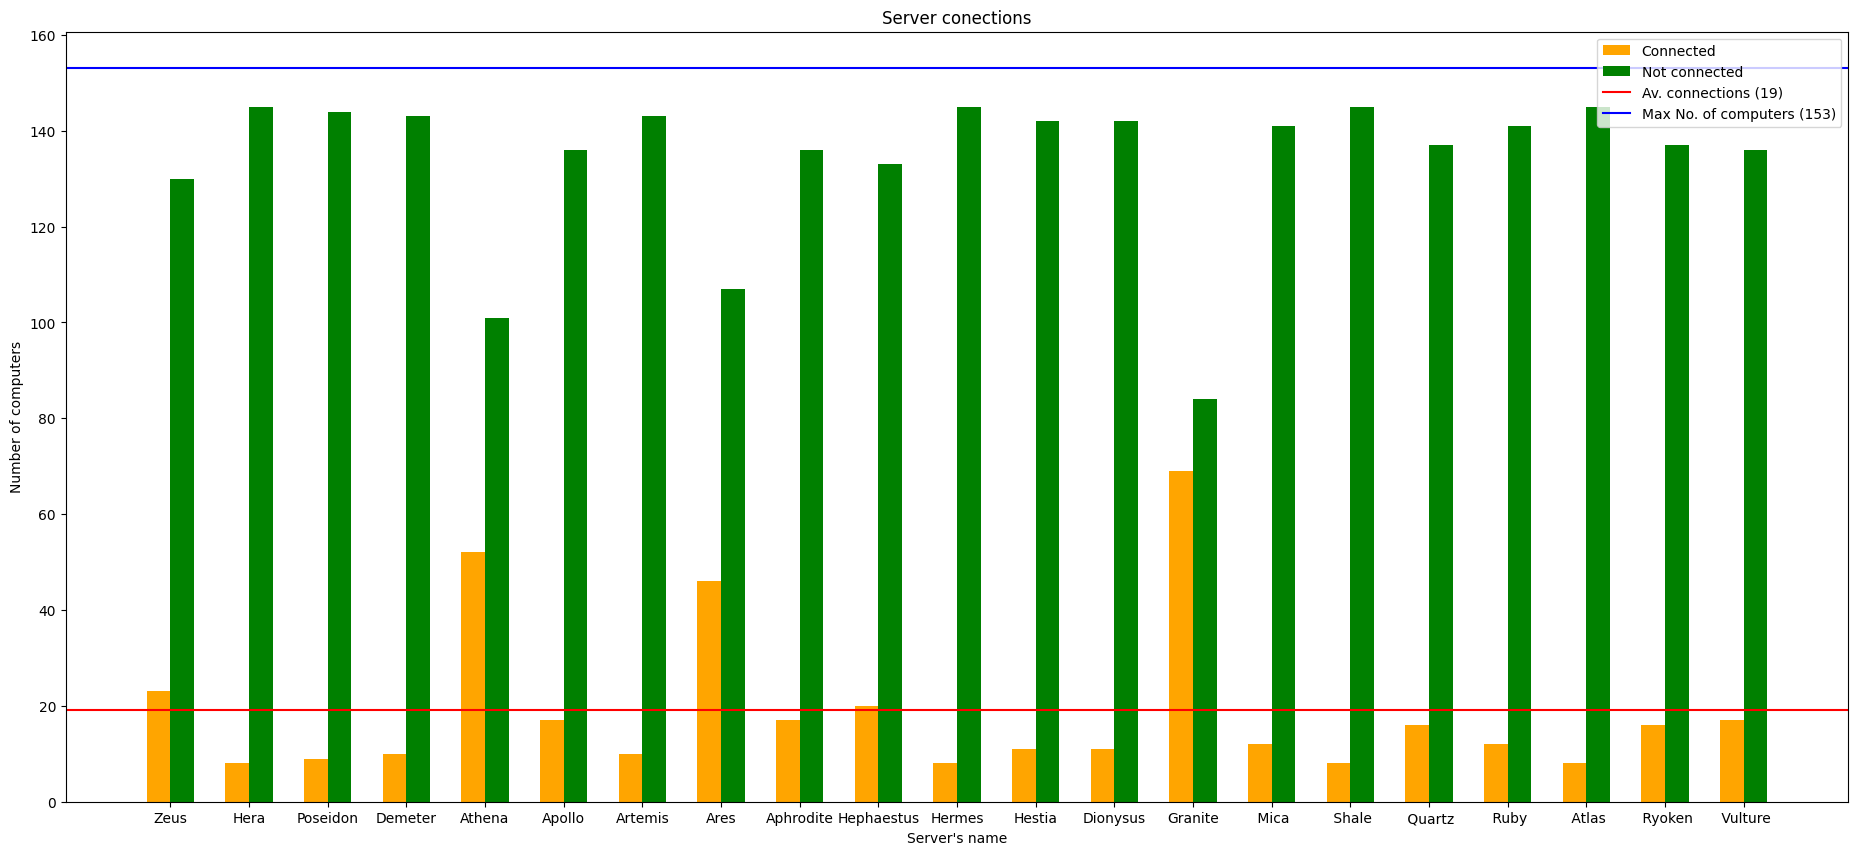

In [16]:
#Summary plot

#ToDo savefig, 
X_axis = np.arange(len(list_of_column_names))

plt.figure(figsize=(23,10))

line1=plt.bar(X_axis - 0.15, cc, 0.3, label = 'Connected',color='orange')
line2=plt.bar(X_axis+ 0.15, not_cc, 0.3, label = 'Not connected',color='green')
line3=plt.axhline(y=mean_connections,c='red', label= 'Av. connections (19)')
line4=plt.axhline(y=153,c='blue', label= 'Max No. of computers (153)')
plt.xticks(X_axis, list_of_column_names)
plt.xlabel("Server's name")
plt.ylabel("Number of computers")
plt.title("Server conections")
# plt.legend(handles=[line1,line3,line4])
plt.legend(handles=[line1,line2,line3,line4])
#plt.savefig('Images/Server Connection.png')
plt.show()
plt.close()

Question 7 - How may servers share the same Computers, i.e. which servers have the most computers in common?

In [17]:
#construncting the dataframe
col_name=[]
for column_headers in data.columns[0:21]:
    col_name.append(column_headers)

weighted_adj=[]
tot_adj=[]
for i in col_name:
    row=[]
    row2=[]
    for j in col_name:
        
        a=data.loc[:,i][data[i]==1]
        b=data.loc[:,j][data[j]==1]
        array1 = a.index.to_numpy()
        array2 = b.index.to_numpy()

        inter= list(set(array1) & set(array2))
        # if i!= j:
        #     row.append(len(inter))
        #     row2.append(len(array1)+len(array2)-len(inter))
        # else:
        #     row.append(len(inter))
        #     row2.append(len(array1)+len(array2)-len(inter))
        row.append(len(inter))
        row2.append(len(array1)+len(array2)-len(inter))
        
    weighted_adj.append(row)
    tot_adj.append(row2)

# print(weighted_adj)
weighted_adj=np.array(weighted_adj)
tot_adj=np.array(tot_adj)
print(weighted_adj.shape)
print(weighted_adj)
# ind = np.unravel_index(np.argmax(weighted_adj, axis=None), weighted_adj.shape)
# # max value of the computers shown 



(21, 21)
[[23  0  1  0  4  4  2  4 12  2  0  2  3 11  1  4  3  9  4  4  5]
 [ 0  8  0  0  6  0  0  5  0  0  0  0  0  3  1  0  0  0  0  0  0]
 [ 1  0  9  0  1  6  0  3  1  0  0  0  0  8  0  2  0  0  2  1  0]
 [ 0  0  0 10  1  0  0  1  0  2  7  0  1  9  0  0  1  0  0  1  2]
 [ 4  6  1  1 52  5  2 33  0  6  1  5  5 21  6  1  4  0  1  4  3]
 [ 4  0  6  0  5 17  2  5  2  2  0  0  0 14  0  2  1  1  2  3  3]
 [ 2  0  0  0  2  2 10  2  2  0  0  0  0  2  0  1  2  2  1  1  2]
 [ 4  5  3  1 33  5  2 46  1  4  1  1  4 19  2  3  4  1  3  4  4]
 [12  0  1  0  0  2  2  1 17  1  0  2  2  6  1  0  2 11  0  5  2]
 [ 2  0  0  2  6  2  0  4  1 20  3  0  0 14  1  0  1  0  0  4  4]
 [ 0  0  0  7  1  0  0  1  0  3  8  0  0  7  0  0  1  0  0  1  2]
 [ 2  0  0  0  5  0  0  1  2  0  0 11  4  0  4  0  0  2  0  0  0]
 [ 3  0  0  1  5  0  0  4  2  0  0  4 11  0  4  0  0  3  0  0  0]
 [11  3  8  9 21 14  2 19  6 14  7  0  0 69  0  5  9  3  5  7 14]
 [ 1  1  0  0  6  0  0  2  1  1  0  4  4  0 12  0  0  2  0  0  0]
 

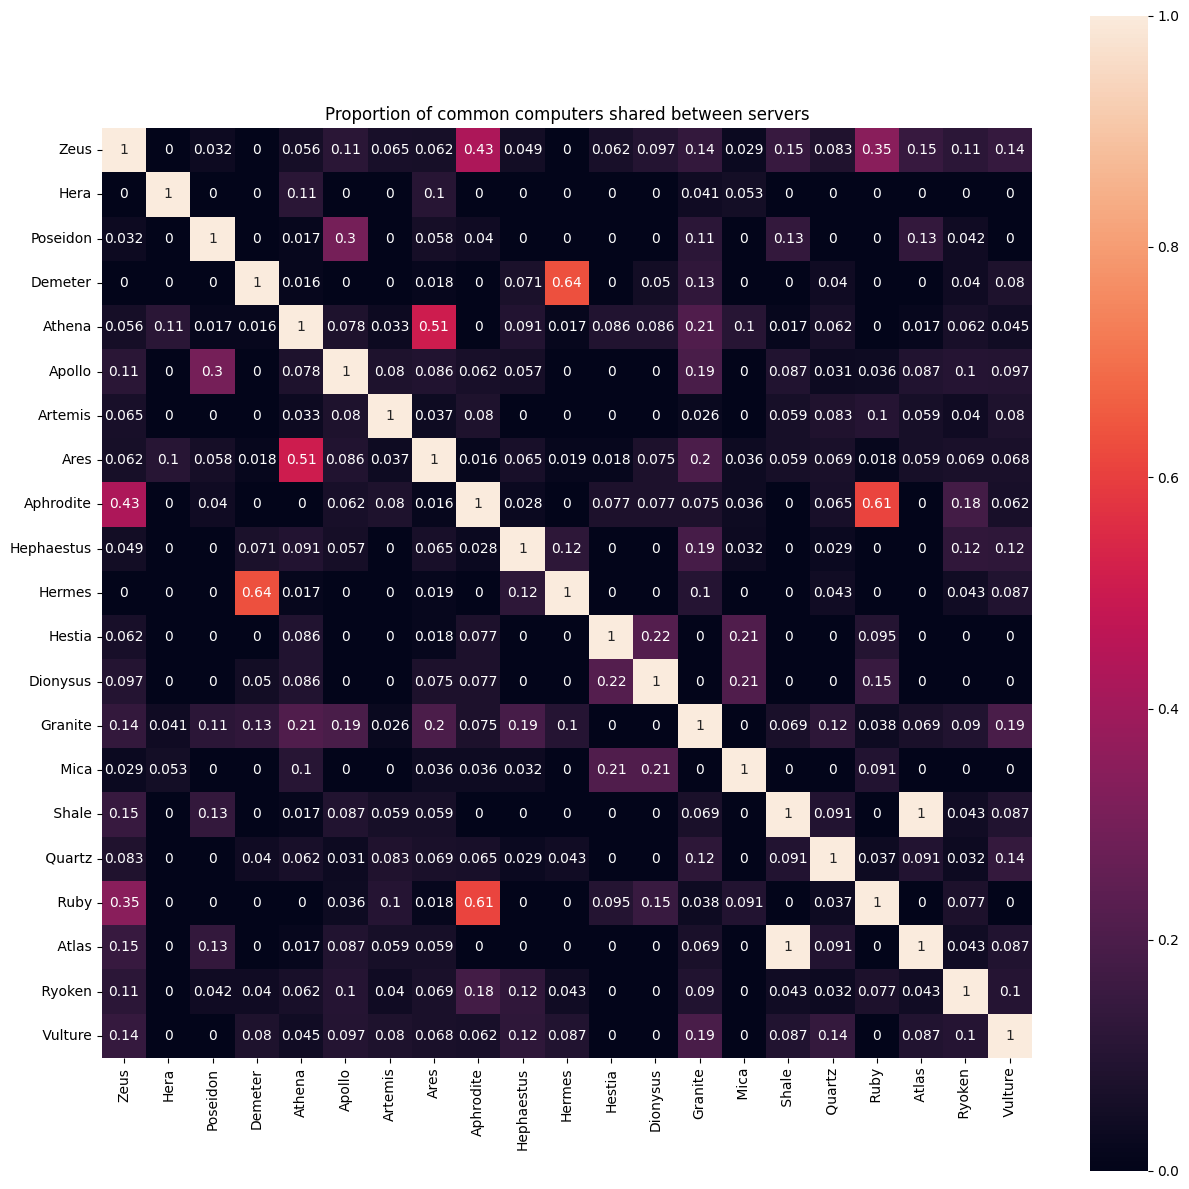

In [18]:
#ToDo add comments on how this heat map is constructed and explain 2 example values

heapMapCorrFeature = pd.DataFrame(weighted_adj/tot_adj,index=list_of_column_names,columns=list_of_column_names) #divided by 33 which is the maximum number of same connection in the matrix
fig = plt.figure(figsize=(15,15))
sns.heatmap(heapMapCorrFeature, annot=True, square = True)
plt.title("Proportion of common computers shared between servers")
plt.show()
plt.close()

In [19]:
# Summary

<br>

<font size="6"> **LINK ANALYSIS SECTION**</font>

<br>

<br>

<font size="4.5">What does the graph with all the data look like?</font>

<br>


In [20]:
#Create a df that symbolizes an edgelist
edgelst_df = pd.DataFrame(columns=['ComputerNumber','Network'])  #creating our source and target using the connected netwrks

for i in range(len(data)):
    for j in list_of_column_names:
        if data[j][i+1] == 1:
            #print(i + 1) #prints the computer number that zeus is connected to
            edgelst_df.loc[0] = [i+1, j]
            edgelst_df.index = edgelst_df.index - 1

edgelst_df.index = edgelst_df.index + len(edgelst_df)
edgelst_df

#convert the edgelist data frame into a list of list (of 2 elementes)
edgelst  = []
for index, row in edgelst_df.iterrows():
    edgelst.append(row.tolist())
      
#all the computer-server connections 
edgelst_df


ComputerNumber     Network
0                 1      Athena
1                 1      Hestia
2                 2      Athena
3                 2      Hestia
4                 2        Mica
..              ...         ...
395             152        Ares
396             152  Hephaestus
397             152     Granite
398             153        Zeus
399             153   Aphrodite

[400 rows x 2 columns]

In [21]:
#Initializing the graph
G2 = nx.Graph()
#adding edges
G2.add_edges_from(edgelst)
#adding nodes
list_of_computers=data.index.values.tolist()
G2.add_nodes_from(list_of_column_names)
G2.add_nodes_from(list_of_computers)


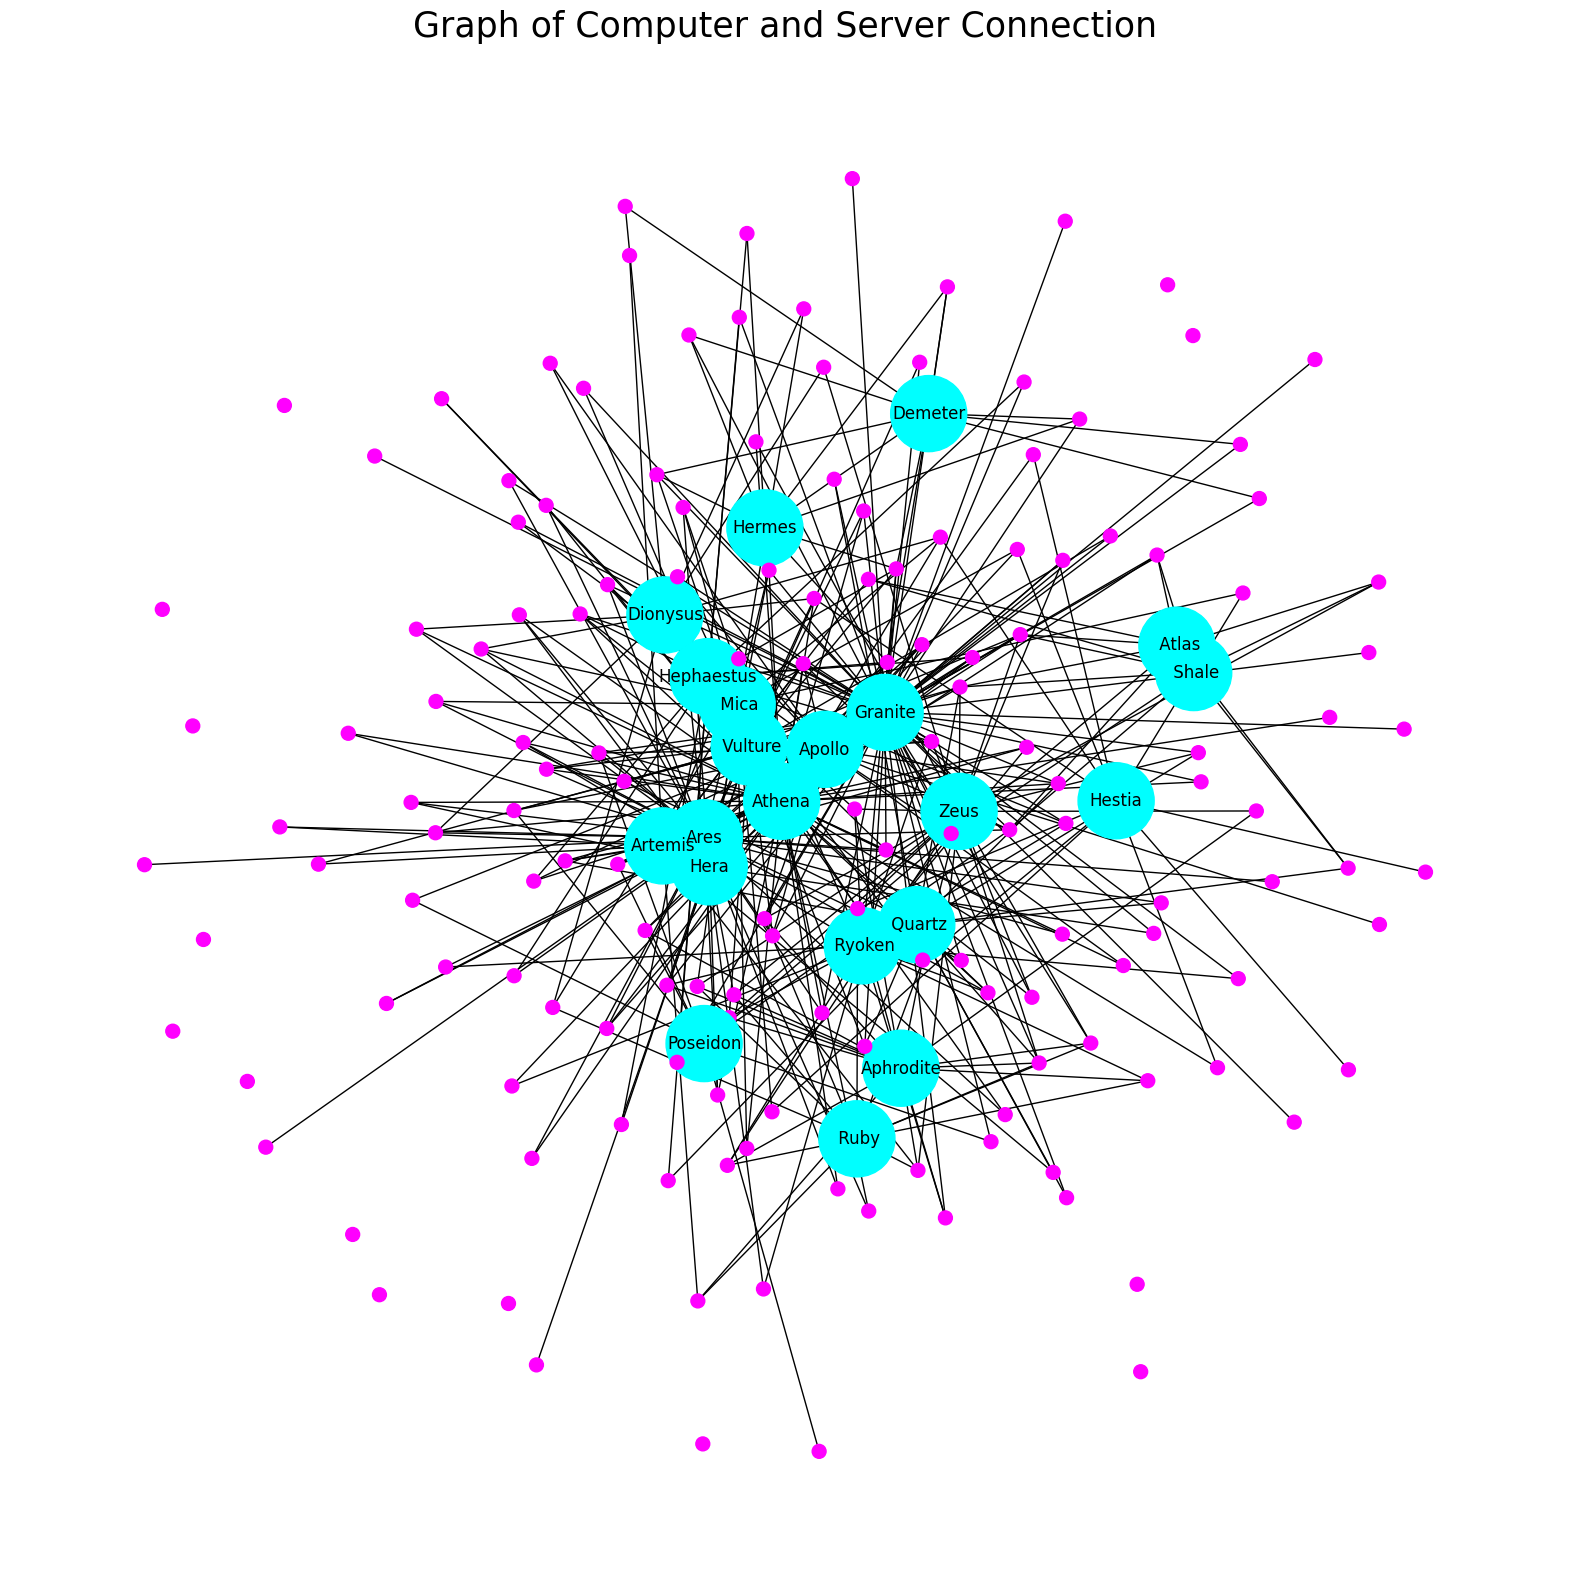

In [22]:
#the nodes that are not connected are the nodes that have 0 connections
#defining position, node color
pos = nx.spring_layout(G2,k=0.5)

node_color =[]
node_size = []
labels={}
for node in G2:
    if type(node) == str:
        node_color.append('cyan')
        node_size.append(3000)
        labels[node]=node
    else: 
        node_color.append('magenta')  
        node_size.append(100)  


plt.figure(figsize=(20,20))
nx.draw_networkx(G2, pos=pos, labels=labels,node_size=node_size,node_color=node_color)

plt.title(label = 'Graph of Computer and Server Connection', fontsize = 25)
plt.axis('off')

plt.savefig('Graph1.png')
plt.show()
plt.close()

This graph does not tells us any useful information. Only that some computers share servers and others do not. 
Everything this graph tells us are things we already know from the pre-porcessing part (like a computer can only be connected to a server and viceversa, a computer can be connected to multiple servers, etc)

It makes more sense to restructure the graph in terms of the servers as nodes. For this we can use the weighted adjacency matrix we constructed for the heat map as a base for the connections. The thickness of the edges can represent the weight (edge attribute) of the shared computers. 

In [23]:
weighted_adj2=weighted_adj-np.diag(np.diag(weighted_adj))
# print(weighted_adj2)

new_edgelst_df=pd.DataFrame(columns=['Source','Target','Weight'])
# new_edgelst_df
for i in range(len(list_of_column_names)):
    for j in range(len(list_of_column_names)):
        lst=[]
        # Constructing the edge list based on the upper triangular part of the weighted_adj excluding the diag 
        if (i < j):
            if weighted_adj2[i][j]!=0:
                lst=[list_of_column_names[i],list_of_column_names[j],float(weighted_adj2[i][j])]
                new_edgelst_df.loc[len(new_edgelst_df)] = lst


new_edgelst_df.set_index(['Source', 'Target'], inplace=True)
new_edgelst_df
dfnodes=pd.DataFrame(data.sum(axis=0), columns=['CC_with_Server'],)
dfnodes




CC_with_Server
Zeus                    23
Hera                     8
Poseidon                 9
Demeter                 10
Athena                  52
Apollo                  17
Artemis                 10
Ares                    46
Aphrodite               17
Hephaestus              20
Hermes                   8
Hestia                  11
Dionysus                11
Granite                 69
 Mica                   12
 Shale                   8
 Quartz                 16
 Ruby                   12
 Atlas                   8
 Ryoken                 16
 Vulture                17

In [24]:
G = nx.from_pandas_edgelist(new_edgelst_df.reset_index(), source='Source', target='Target')
G.number_of_nodes(), G.number_of_edges(), G.is_directed()

(21, 128, False)

In [25]:
### Mapping node attributes values to dictionaries.

dict_mapping_node_id_to_label = dfnodes.to_dict()['CC_with_Server']
nx.set_node_attributes(G, dict_mapping_node_id_to_label, 'cc_with_server')
dict_mapping_node_id_to_label


{'Zeus': 23,
 'Hera': 8,
 'Poseidon': 9,
 'Demeter': 10,
 'Athena': 52,
 'Apollo': 17,
 'Artemis': 10,
 'Ares': 46,
 'Aphrodite': 17,
 'Hephaestus': 20,
 'Hermes': 8,
 'Hestia': 11,
 'Dionysus': 11,
 'Granite': 69,
 ' Mica': 12,
 ' Shale': 8,
 ' Quartz': 16,
 ' Ruby': 12,
 ' Atlas': 8,
 ' Ryoken': 16,
 ' Vulture': 17}

In [26]:
### Mapping edge attributes values to dictionaries.

dict_mapping_edge_id_to_label = new_edgelst_df.to_dict()['Weight']
nx.set_edge_attributes(G, dict_mapping_edge_id_to_label, 'weight')
dict_mapping_edge_id_to_label

{('Zeus', 'Poseidon'): 1.0,
 ('Zeus', 'Athena'): 4.0,
 ('Zeus', 'Apollo'): 4.0,
 ('Zeus', 'Artemis'): 2.0,
 ('Zeus', 'Ares'): 4.0,
 ('Zeus', 'Aphrodite'): 12.0,
 ('Zeus', 'Hephaestus'): 2.0,
 ('Zeus', 'Hestia'): 2.0,
 ('Zeus', 'Dionysus'): 3.0,
 ('Zeus', 'Granite'): 11.0,
 ('Zeus', ' Mica'): 1.0,
 ('Zeus', ' Shale'): 4.0,
 ('Zeus', ' Quartz'): 3.0,
 ('Zeus', ' Ruby'): 9.0,
 ('Zeus', ' Atlas'): 4.0,
 ('Zeus', ' Ryoken'): 4.0,
 ('Zeus', ' Vulture'): 5.0,
 ('Hera', 'Athena'): 6.0,
 ('Hera', 'Ares'): 5.0,
 ('Hera', 'Granite'): 3.0,
 ('Hera', ' Mica'): 1.0,
 ('Poseidon', 'Athena'): 1.0,
 ('Poseidon', 'Apollo'): 6.0,
 ('Poseidon', 'Ares'): 3.0,
 ('Poseidon', 'Aphrodite'): 1.0,
 ('Poseidon', 'Granite'): 8.0,
 ('Poseidon', ' Shale'): 2.0,
 ('Poseidon', ' Atlas'): 2.0,
 ('Poseidon', ' Ryoken'): 1.0,
 ('Demeter', 'Athena'): 1.0,
 ('Demeter', 'Ares'): 1.0,
 ('Demeter', 'Hephaestus'): 2.0,
 ('Demeter', 'Hermes'): 7.0,
 ('Demeter', 'Dionysus'): 1.0,
 ('Demeter', 'Granite'): 9.0,
 ('Demeter', ' Quar

In [27]:
###this is the node size that will be assigned to the nodes 
###and they are based on the computer connections of each server
node_size = list(nx.get_node_attributes(G,'cc_with_server').values())
node_size


[23, 9, 52, 17, 10, 46, 17, 20, 11, 11, 69, 12, 8, 16, 12, 8, 16, 17, 8, 10, 8]

<br>

<font size="4.5">Server based Graph representation</font>

<br>


(-0.8263235297332056,
 0.9101081092145874,
 -0.8809781176394449,
 1.1787354772417573)

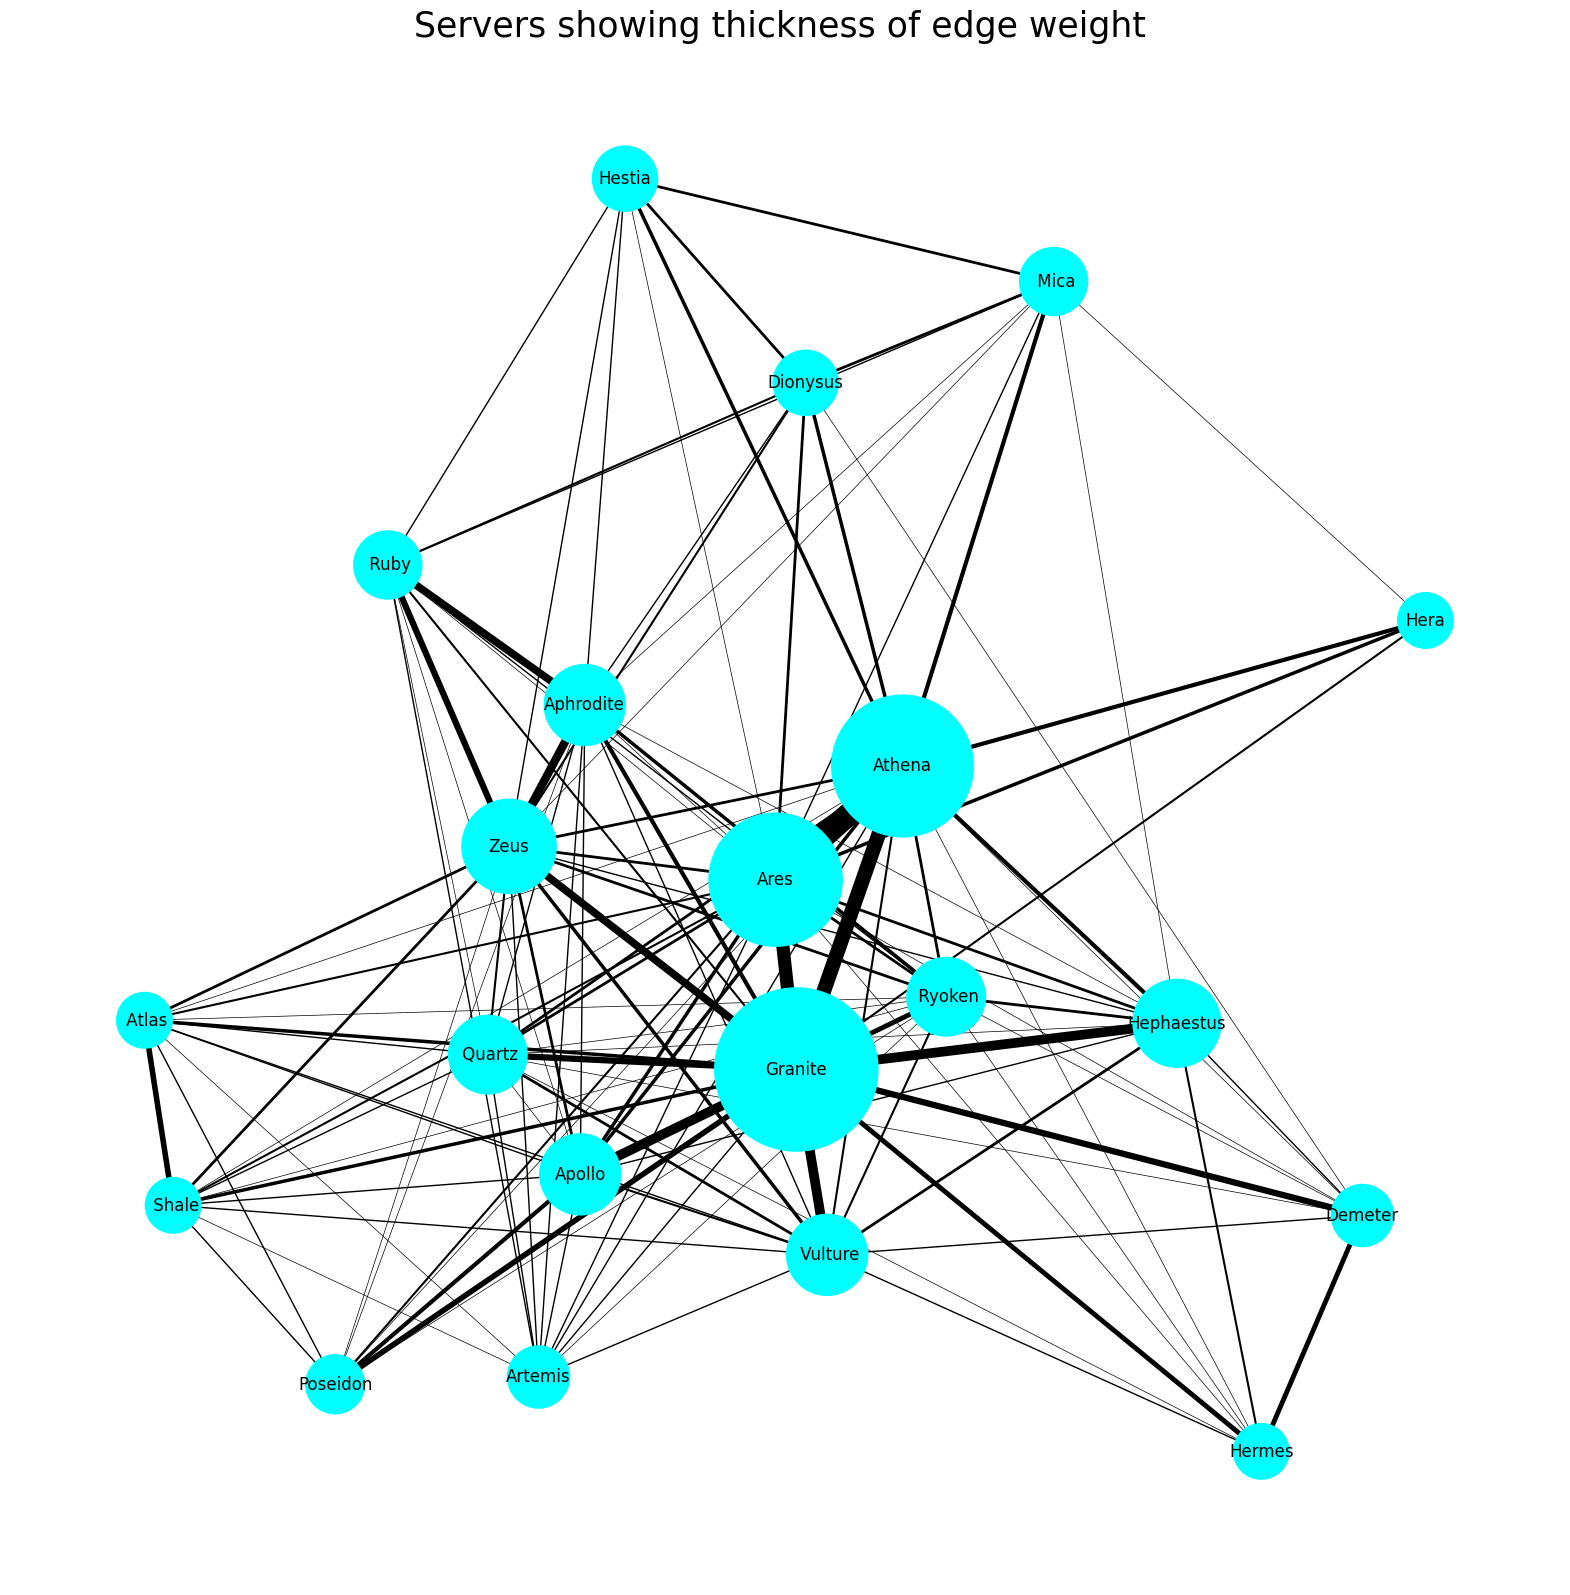

In [28]:

pos = nx.spring_layout(G, weight='weight')
# node_color = [20000.0 * G.degree(v) for v in G]
node_size = list(nx.get_node_attributes(G,'cc_with_server').values())
node_size = [i * 200 for i in node_size]



edge_weight = pd.Series(nx.get_edge_attributes(G, 'weight'), dtype=float)
edge_weight = edge_weight/2
plt.figure(figsize=(20,20))

#this graph shows that although granite has more connection to computer, ares still has more same 
#check if ares is gone later - like remove it from the graph
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color="cyan",
                 node_size=node_size,
                 width=edge_weight)

plt.title(label = 'Servers showing thickness of edge weight ', fontsize = 25)
plt.axis('off')


<br>

<font size="5">Degree centrality</font>

<br>

In [29]:
###CENTRALITIES FOR DIRECTED GRAPH
deg_cen = pd.Series(nx.degree_centrality(G))
# eigenvectorCen = nx.eigenvector_centrality(G)

# deg_cen.sort_values(ascending=False)

In [30]:
#creating a new dataframe, so that I can add the centralities
CenData = pd.DataFrame()
CenData['degree_centrality'] = deg_cen
CenData

degree_centrality
Zeus                     0.85
Poseidon                 0.45
Athena                   0.90
Apollo                   0.70
Artemis                  0.60
Ares                     1.00
Aphrodite                0.70
Hephaestus               0.60
Hestia                   0.35
Dionysus                 0.40
Granite                  0.85
 Mica                    0.45
 Shale                   0.55
 Quartz                  0.75
 Ruby                    0.55
 Atlas                   0.55
 Ryoken                  0.80
 Vulture                 0.70
Hera                     0.20
Demeter                  0.45
Hermes                   0.40

In [31]:
##putting the degree centrality data as a dictionary, 
#so it can be used in the nodes
dict_mapping_node_id_to_centrality = CenData.to_dict()['degree_centrality']
nx.set_node_attributes(G, dict_mapping_node_id_to_centrality, 'degree_centrality')

# list(nx.get_node_attributes(G,'degree_centrality').values())

Ares         1.00
Athena       0.90
Zeus         0.85
Granite      0.85
 Ryoken      0.80
 Quartz      0.75
Aphrodite    0.70
 Vulture     0.70
Apollo       0.70
Artemis      0.60
dtype: float64

Text(0.5, 0, 'Degree Score')

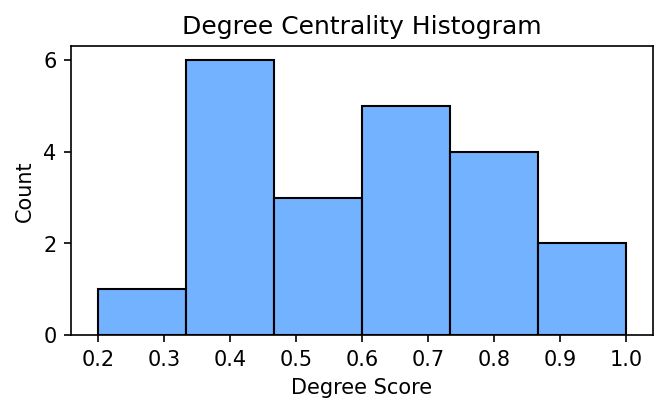

In [32]:
#plotting the degree centrality on a graph
display(deg_cen.sort_values(ascending=False).head(10))
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5), dpi=150)
sns.histplot(deg_cen, ax=ax,  color='#4499FF')
ax.set_ylim(0)
ax.set_title('Degree Centrality Histogram')
plt.ylabel("Count")
plt.xlabel("Degree Score")

(-1.2020129604187093,
 1.125945916787369,
 -1.0951774200454318,
 0.9595387442506492)

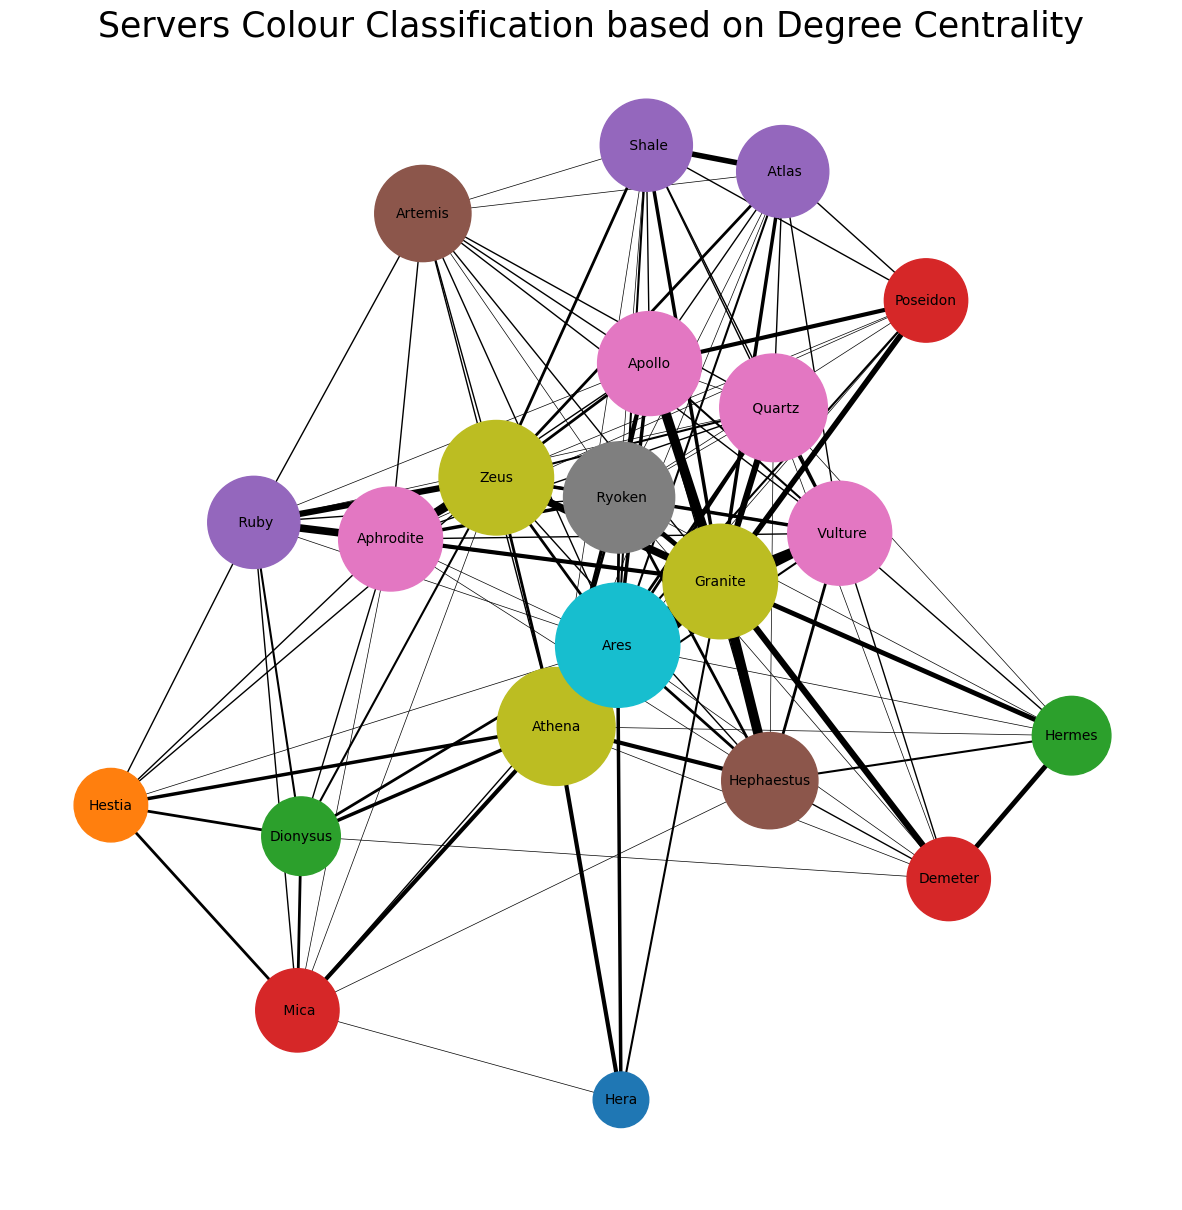

In [33]:
#the nodes with the same colour, has the same or similar degree centrality

degree_central_servers = G.subgraph(CenData[CenData['degree_centrality'] > 0].index)

node_size = pd.Series(nx.get_node_attributes(degree_central_servers, 'degree_centrality'), dtype=float)
edge_weight = pd.Series(nx.get_edge_attributes(degree_central_servers, 'weight'), dtype=float)
                                                                                         

scale = 8
node_size = (node_size * 10) * scale * 100
edge_weight = edge_weight / 2
node_color_values = [ degree_central_servers.degree(v) for v in degree_central_servers]                                         

plt.figure(figsize=(15,15))
pos = nx.spring_layout(degree_central_servers, weight='weight')
                                             
                                             
nx.draw_networkx(degree_central_servers, pos=pos, node_size=node_size, 
                 node_color=node_color_values,
                 cmap=plt.cm.tab10, font_size=10, width=edge_weight)

plt.title(label = 'Servers Colour Classification based on Degree Centrality', fontsize = 25)
plt.axis('off')


<br>

<font size="5">Betweeness centrality</font>

<br>


<font size="4.5">Which server has the most influence? Is it still granite because it has the most connection?</font>

<br>

In [34]:
#getting the betweenness centrality of the graph
betweennessCen = pd.Series(nx.betweenness_centrality(G))


In [35]:
##addded the betweenness centrality of the graph to the centrality dataframe

CenData['betweenness_centrality'] = betweennessCen
dict_mapping_node_id_to_bet_centrality = CenData.to_dict()['betweenness_centrality']
nx.set_node_attributes(G, dict_mapping_node_id_to_bet_centrality, 'betweenness_centrality')

display(CenData.sort_values('betweenness_centrality', ascending=False).head(10))

degree_centrality  betweenness_centrality
Ares                    1.00                0.095674
Athena                  0.90                0.082371
Granite                 0.85                0.048694
Zeus                    0.85                0.044465
Aphrodite               0.70                0.029018
 Ryoken                 0.80                0.025010
 Quartz                 0.75                0.018995
 Ruby                   0.55                0.014436
 Vulture                0.70                0.013281
 Mica                   0.45                0.013168

Text(0.5, 0, 'Betweenness Score')

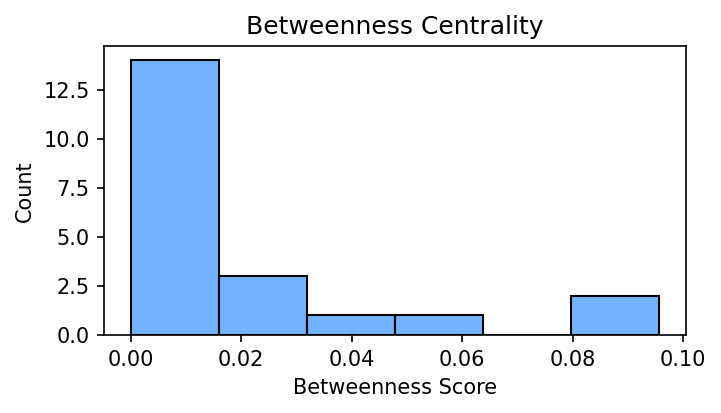

In [36]:
#plotting the betweenness centrality on a graph
# display(betweennessCen.sort_values(ascending=False).head(10))
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5), dpi=150)
sns.histplot(betweennessCen,  color='#4499FF')
ax.set_ylim(0)
ax.set_title('Betweenness Centrality')
plt.ylabel("Count")
plt.xlabel("Betweenness Score")

(-0.9591558320077991,
 1.1830218057938464,
 -1.046155095843828,
 1.1944310272068797)

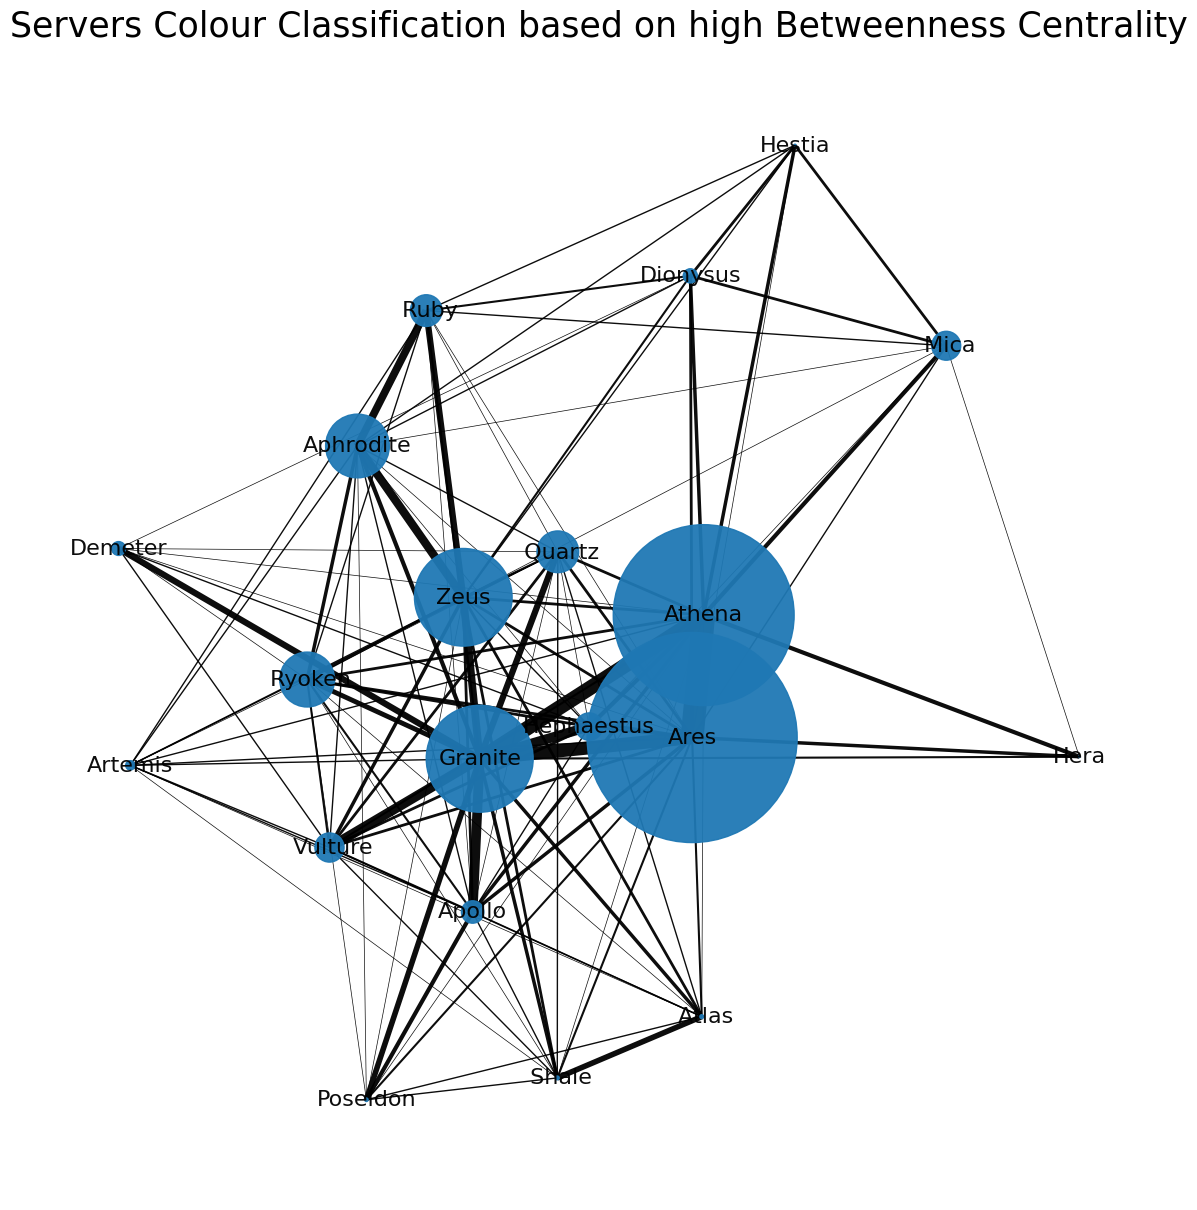

In [37]:
#the nodes with the same colour, has the same or similar between centrality

betweenness_central_servers = G.subgraph(CenData[CenData['betweenness_centrality'] > 0].index)


node_size = pd.Series(nx.get_node_attributes(betweenness_central_servers, 'betweenness_centrality'), dtype=float)
edge_weight = pd.Series(nx.get_edge_attributes(betweenness_central_servers, 'weight'), dtype=float)

scale = 100


node_size = (node_size * 10)** 2 * scale*250
edge_weight = edge_weight / 2


#ERROR HAVE TO FIGURE OUT A WAY TO GET THE COLOURS TO WORK
plt.figure(figsize=(15,15))

pos = nx.spring_layout(betweenness_central_servers, weight='weight')

nx.draw_networkx(betweenness_central_servers, pos=pos,
 node_size=node_size, font_size=16, width=edge_weight, alpha=.95
 )


plt.title(label = 'Servers Colour Classification based on high Betweenness Centrality', fontsize = 25)
plt.axis('off')



<br>

<font size="5">Closeness centrality</font>

<br>


<font size="4.5">Which servers are highly connected with each other?</font>

<br>

In [38]:
###CLOSENESS CENTRALITIES
closenessCen = pd.Series(nx.closeness_centrality(G))

# closenessCen.sort_values(ascending=False)

In [39]:
#adding the closeness centrality to the centrality dataframe
CenData['closenness_centrality'] = closenessCen
dict_mapping_node_id_to_closenness_centrality = CenData.to_dict()['closenness_centrality']
nx.set_node_attributes(G, dict_mapping_node_id_to_closenness_centrality, 'closenness_centrality')

display(CenData.sort_values('closenness_centrality', ascending=False))

degree_centrality  betweenness_centrality  closenness_centrality
Ares                     1.00                0.095674               1.000000
Athena                   0.90                0.082371               0.909091
Zeus                     0.85                0.044465               0.869565
Granite                  0.85                0.048694               0.869565
 Ryoken                  0.80                0.025010               0.833333
 Quartz                  0.75                0.018995               0.800000
Aphrodite                0.70                0.029018               0.769231
 Vulture                 0.70                0.013281               0.769231
Apollo                   0.70                0.010204               0.769231
Artemis                  0.60                0.004262               0.714286
Hephaestus               0.60                0.012454               0.714286
 Atlas                   0.55                0.001754               0.689655
 Ruby                    0.55                0.014436               0.689655
 Shale                   0.55                0.001754               0.689655
 Mica                    0.45                0.013168               0.645161
Poseidon                 0.45                0.001574               0.645161
Demeter                  0.45                0.006316               0.645161
Dionysus                 0.40                0.006464               0.625000
Hermes                   0.40                0.000000               0.625000
Hestia                   0.35                0.000931               0.606061
Hera                     0.20                0.000752               0.555556

Ares         1.000000
Athena       0.909091
Zeus         0.869565
Granite      0.869565
 Ryoken      0.833333
 Quartz      0.800000
Aphrodite    0.769231
 Vulture     0.769231
Apollo       0.769231
Artemis      0.714286
dtype: float64

Text(0.5, 0, 'Closeness Score')

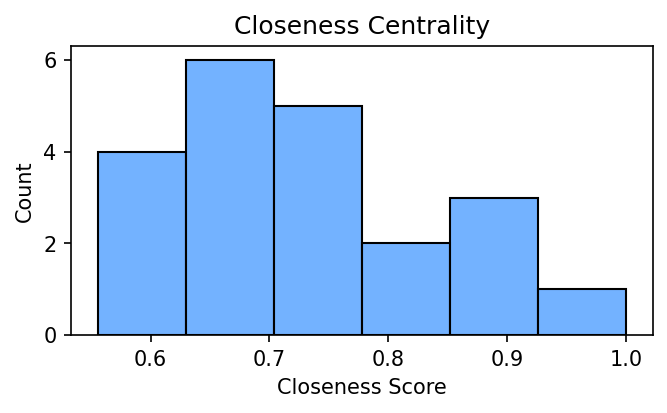

In [40]:

display(closenessCen.sort_values(ascending=False).head(10))
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5), dpi=150)
sns.histplot(closenessCen, ax=ax, color='#4499FF')
ax.set_ylim(0)
ax.set_title('Closeness Centrality')
plt.ylabel("Count")
plt.xlabel("Closeness Score")

(-1.2071291159068436,
 1.1797873626386872,
 -0.9977189480548999,
 1.1138198299394477)

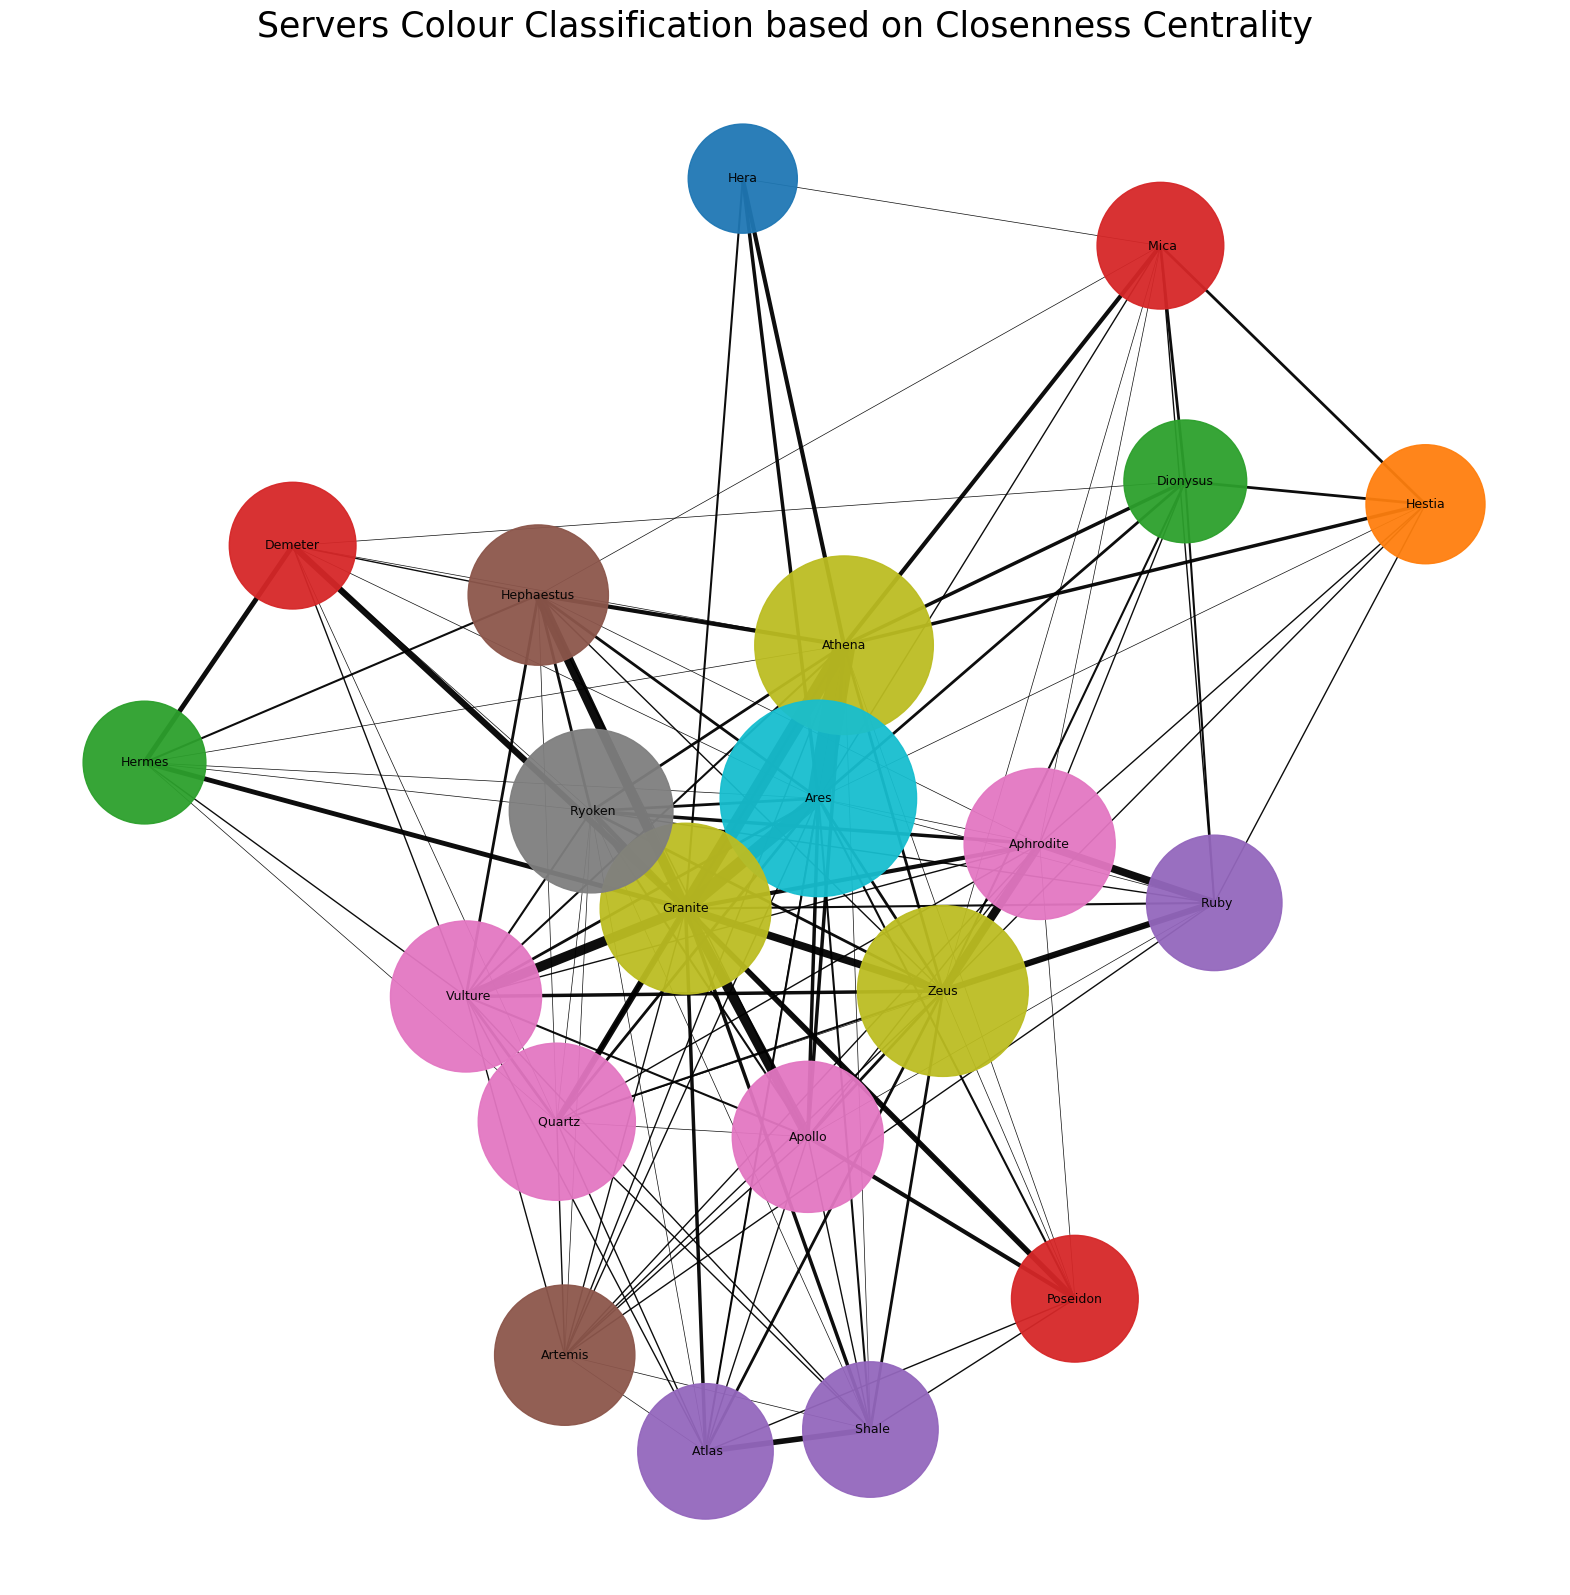

In [41]:
#the nodes with the same colour closenness centrality

closeness_central_servers = G.subgraph(CenData[CenData['closenness_centrality'] > 0].index)


node_size = pd.Series(nx.get_node_attributes(closeness_central_servers, 'closenness_centrality'), dtype=float)
edge_weight = pd.Series(nx.get_edge_attributes(closeness_central_servers, 'weight'), dtype=float)


node_size = (node_size * 10)** 2 *200
edge_weight = edge_weight / 2
node_color_values = [closeness_central_servers.degree(v) for v in closeness_central_servers]  

plt.figure(figsize=(20,20))

pos = nx.spring_layout(closeness_central_servers, weight='weight')

nx.draw_networkx(closeness_central_servers, pos=pos, node_color=node_color_values,
 node_size=node_size,  cmap=plt.cm.tab10, font_size=9, width=edge_weight, alpha=.95
 )


plt.title(label = 'Servers Colour Classification based on Closenness Centrality', fontsize = 25)
plt.axis('off')

<br>

<font size="5">Page Rank</font>

<br>

<font size="4.5">Which servers is the most popular?</font>

<br>

In [42]:
pr = pd.Series(nx.pagerank(G, alpha = 0.8))
pr

Zeus          0.070604
Poseidon      0.028404
Athena        0.097381
Apollo        0.049898
Artemis       0.025907
Ares          0.091960
Aphrodite     0.050538
Hephaestus    0.043154
Hestia        0.026747
Dionysus      0.031808
Granite       0.135957
 Mica         0.028602
 Shale        0.034229
 Quartz       0.039059
 Ruby         0.040303
 Atlas        0.034229
 Ryoken       0.043020
 Vulture      0.050064
Hera          0.020468
Demeter       0.029701
Hermes        0.027965
dtype: float64

In [43]:
###adding the page rank to the link analysis dataframe
CenData['page_rank'] = pr
dict_mapping_node_id_to_page_rank = CenData.to_dict()['page_rank']
nx.set_node_attributes(G, dict_mapping_node_id_to_page_rank, 'page_rank')

display(CenData.sort_values('page_rank', ascending=False).head(10))

degree_centrality  betweenness_centrality  closenness_centrality  \
Granite                  0.85                0.048694               0.869565   
Athena                   0.90                0.082371               0.909091   
Ares                     1.00                0.095674               1.000000   
Zeus                     0.85                0.044465               0.869565   
Aphrodite                0.70                0.029018               0.769231   
 Vulture                 0.70                0.013281               0.769231   
Apollo                   0.70                0.010204               0.769231   
Hephaestus               0.60                0.012454               0.714286   
 Ryoken                  0.80                0.025010               0.833333   
 Ruby                    0.55                0.014436               0.689655   

            page_rank  
Granite      0.135957  
Athena       0.097381  
Ares         0.091960  
Zeus         0.070604  
Aphrodite    0.050538  
 Vulture     0.050064  
Apollo       0.049898  
Hephaestus   0.043154  
 Ryoken      0.043020  
 Ruby        0.040303

Granite       0.135957
Athena        0.097381
Ares          0.091960
Zeus          0.070604
Aphrodite     0.050538
 Vulture      0.050064
Apollo        0.049898
Hephaestus    0.043154
 Ryoken       0.043020
 Ruby         0.040303
dtype: float64

Text(0.5, 0, 'Page Rank Score')

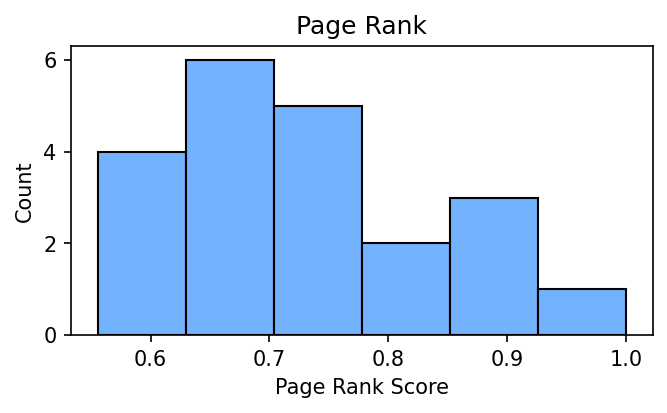

In [44]:
#plotting the page rank on a graph
display(pr.sort_values(ascending=False).head(10))
fig, ax = plt.subplots(1, 1, figsize=(5, 2.5), dpi=150)
sns.histplot(closenessCen, ax=ax, color='#4499FF')
ax.set_ylim(0)
ax.set_title('Page Rank') 
plt.ylabel("Count")
plt.xlabel("Page Rank Score")

(-1.1340888552839021,
 1.0551845544989389,
 -1.171935209026039,
 1.2063829836631077)

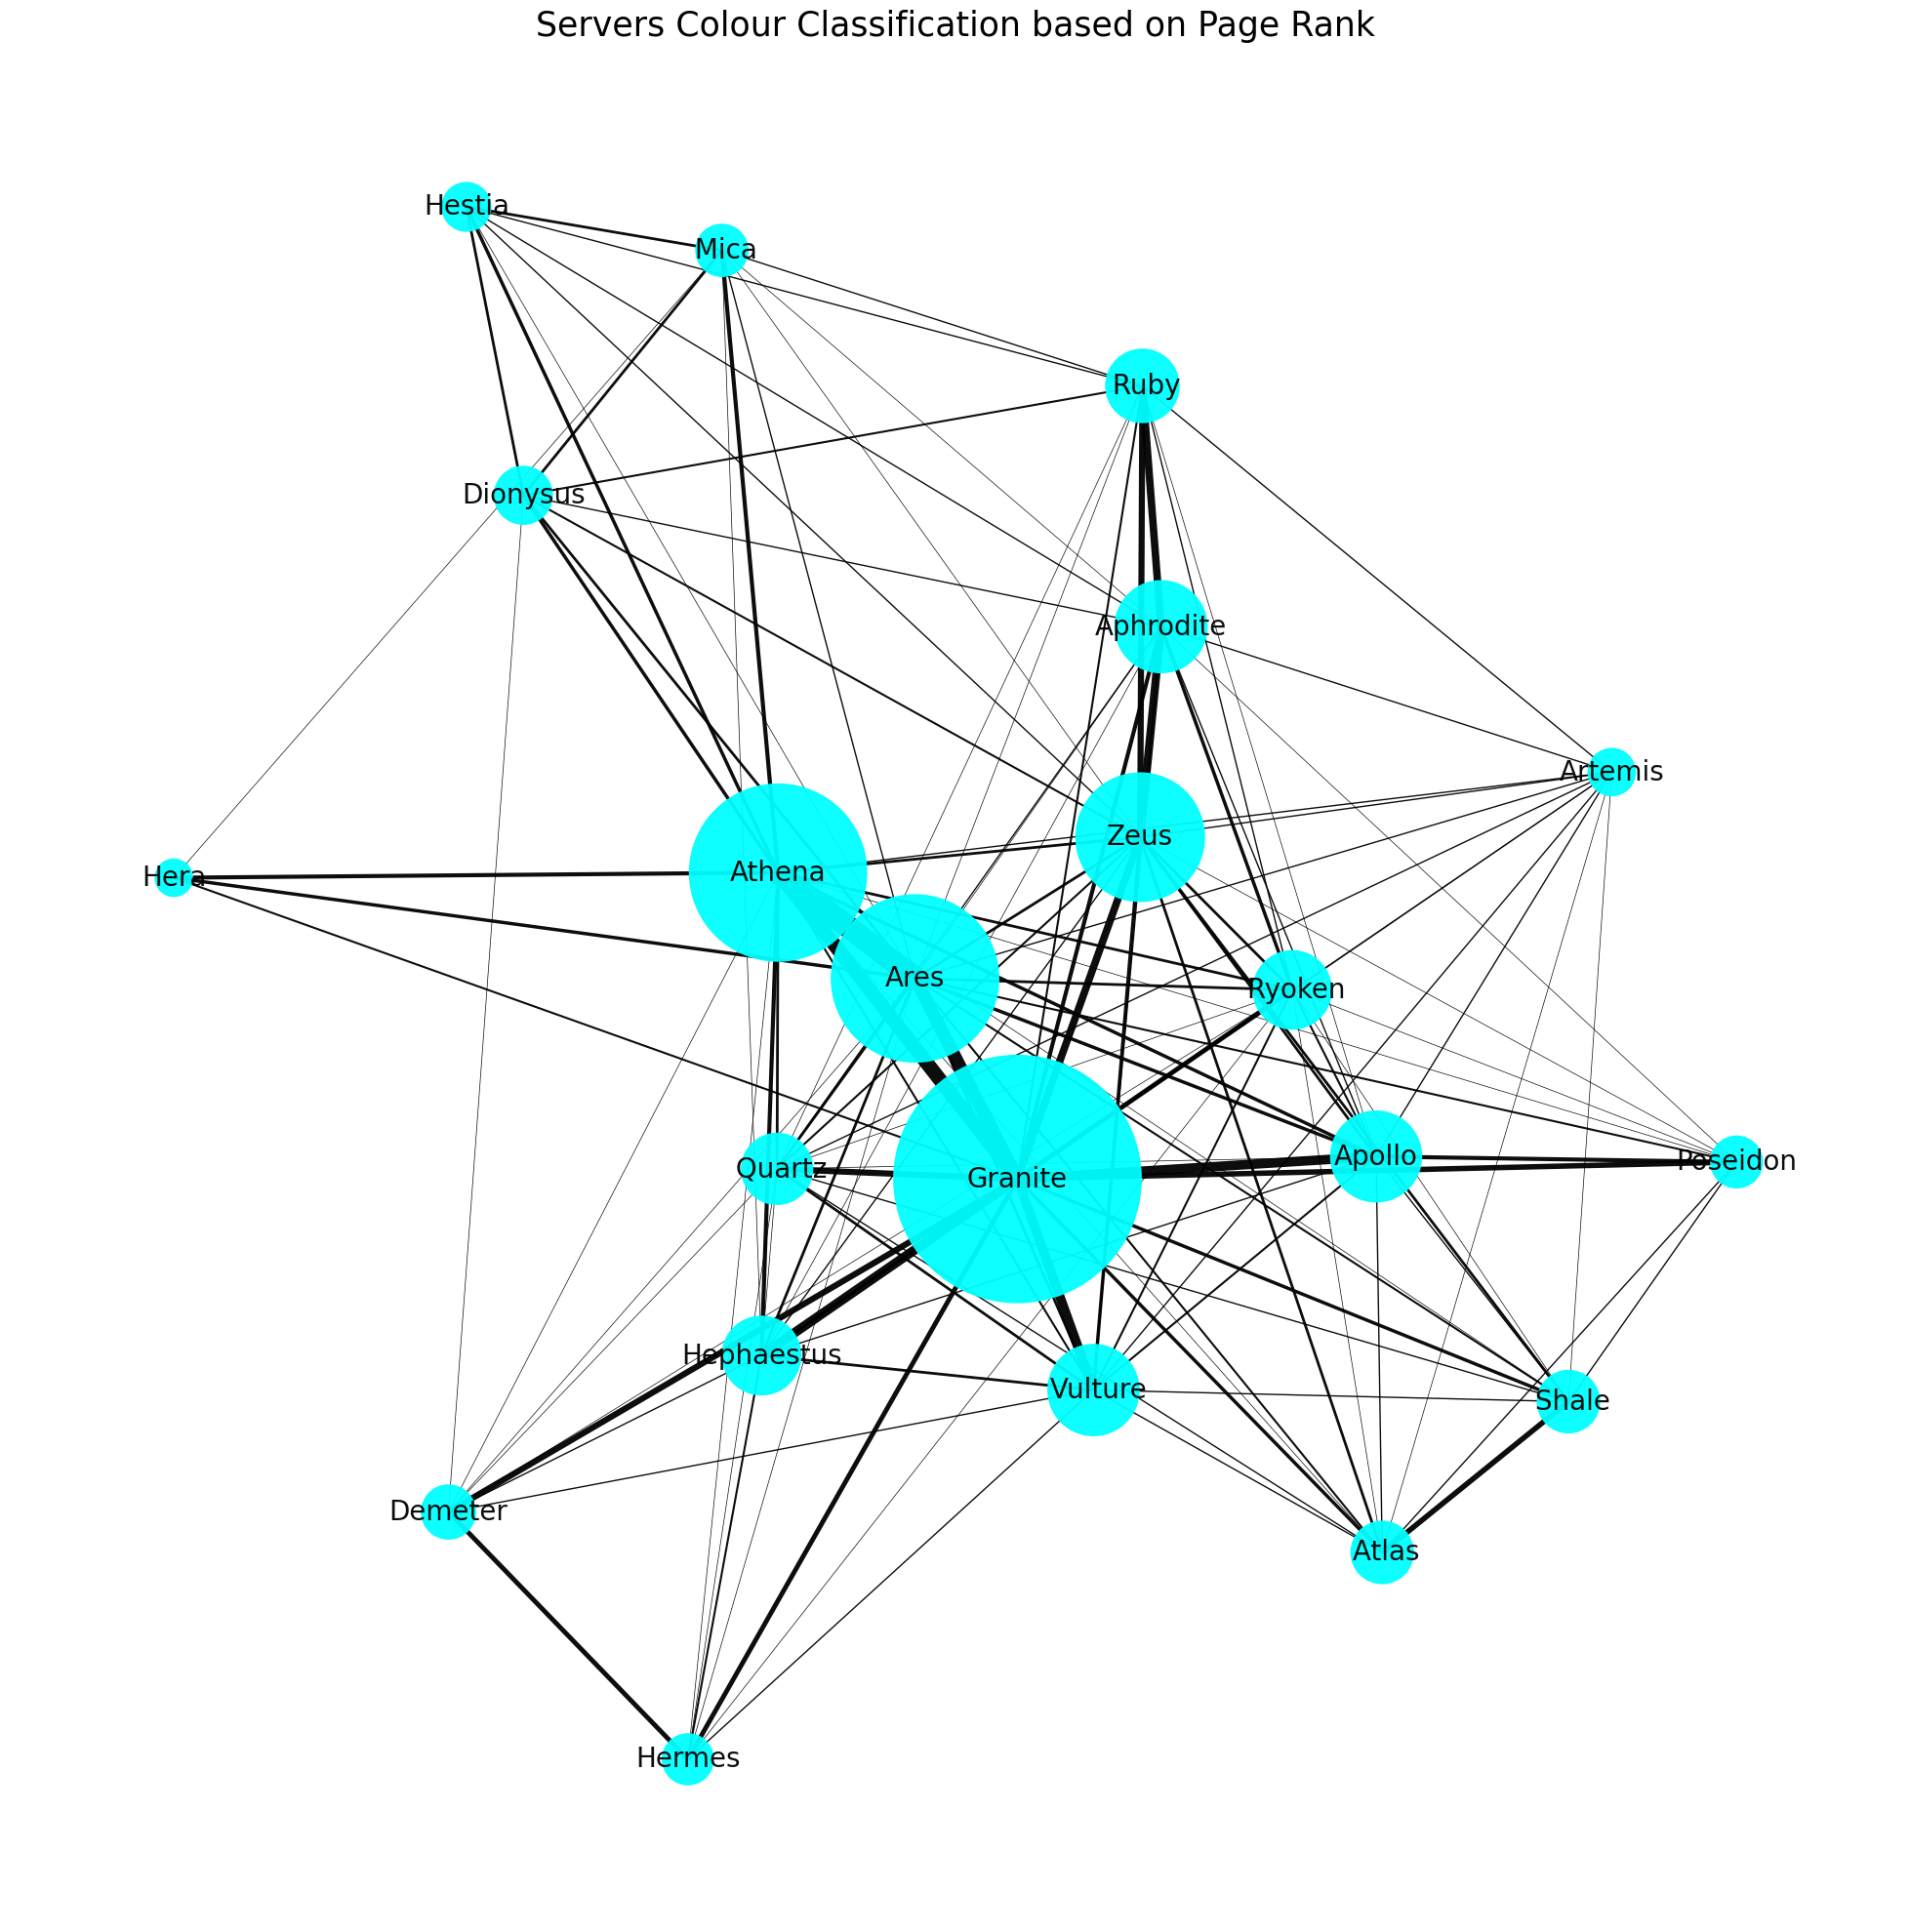

In [45]:
#the nodes with the same colour page rank

page_rank_servers = G.subgraph(CenData[CenData['page_rank'] > 0].index)


node_size = pd.Series(nx.get_node_attributes(page_rank_servers, 'page_rank'), dtype=float)
edge_weight = pd.Series(nx.get_edge_attributes(page_rank_servers, 'weight'), dtype=float)

scale = 30

node_size = (node_size * 10)** 2 * scale * 600
edge_weight = edge_weight / 2  
# node_color_values = [page_rank_servers.degree(v) for v in page_rank_servers] 

plt.figure(figsize=(25,25))

pos = nx.spring_layout(page_rank_servers, weight='weight')

nx.draw_networkx(page_rank_servers, pos=pos, node_color="cyan",
 node_size=node_size, font_size=20, width=edge_weight, alpha=.95
 )


plt.title(label = 'Servers Colour Classification based on Page Rank', fontsize = 25)
plt.axis('off')

<br>

<font size="4.5">Does any of the centralities have any correlation with each other?</font>

<br>

Text(0.5, 1.0, 'Centrality measures correlation')

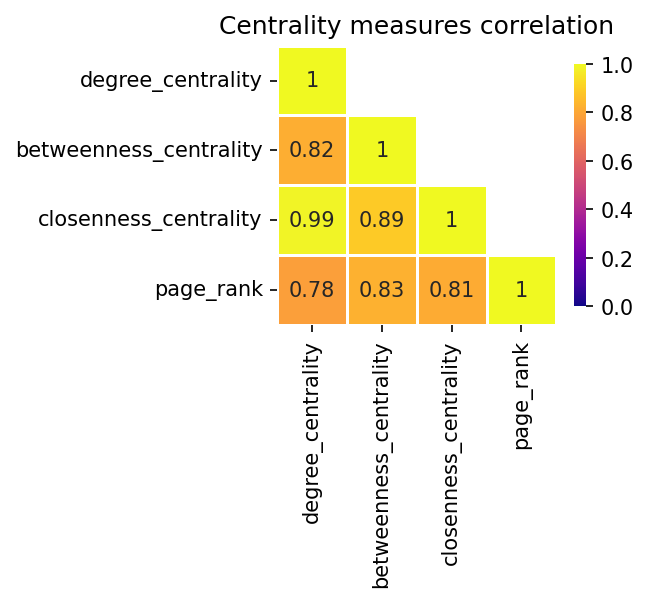

In [46]:
#computing the correlation between all centralities to see how they are all similar using the correlation

CenData_centralities = CenData[ ['degree_centrality', 'betweenness_centrality', 'closenness_centrality', 'page_rank']]

#CenData_centralities.rename(lambda x: x.replace('_centrality', ''), axis='columns', inplace=True)
correlation = CenData_centralities.corr()

fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)

mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)
# correlation ranges from -1 to 1, here we use the range 0 to 1 since centralities are positively correlated
sns.heatmap(correlation, ax=ax, mask=mask,
 cmap=plt.cm.plasma, vmin=0, vmax=1,
 annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .7})

ax.set_title('Centrality measures correlation')


<br>

<font size="5">Hubs and authorities</font>

<br>

In [47]:
##identify the relevant and popular links in a graph - part of link analysis

hubs, authority = nx.hits(G2)

hubs = pd.Series(hubs)
authority = pd.Series(authority)

#links received
print("Hubs")
print(sorted(hubs.items(), key=lambda x: x[1], reverse=True))

print("\n\n")

#popularity of the links
print("Authority")
print(sorted(authority.items(), key=lambda x: x[1], reverse=True))

Hubs
[('Granite', 0.08950065145010608), ('Athena', 0.06946567319495865), ('Ares', 0.06383807127441059), ('Zeus', 0.022811719586680497), ('Apollo', 0.022588544745481404), ('Hephaestus', 0.022431366634746715), (' Vulture', 0.021440246901338812), (' Quartz', 0.015885671016436335), (' Ryoken', 0.015543564161410927), ('Aphrodite', 0.01192659112774756), ('Poseidon', 0.010803436935262749), ('Demeter', 0.010229526670273058), (' Shale', 0.009253658487812729), (' Atlas', 0.009253658487812729), (12, 0.009169818830186499), ('Hera', 0.009019597157757003), (119, 0.00889376628107666), ('Hermes', 0.008683137133709736), (117, 0.00851872880383133), (55, 0.008513272421526202), (78, 0.008513272421526202), (152, 0.008513272421526202), (149, 0.008478866051896544), (121, 0.00805444804994693), (126, 0.008053230984014727), (35, 0.00804768760623207), (42, 0.00804768760623207), (108, 0.007916665784363824), (36, 0.007734575493477179), (138, 0.007734575493477179), (143, 0.007734575493477179), (151, 0.0077345754934

/Users/fmd/Library/Python/3.8/lib/python/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


In [48]:
###adding the page rank to the link analysis dataframe
CenData['authority'] = authority
CenData['hubs'] = hubs

dict_mapping_node_id_to_autority = CenData.to_dict()['authority']
dict_mapping_node_id_to_hubs = CenData.to_dict()['hubs']

nx.set_node_attributes(G, dict_mapping_node_id_to_autority, 'authority')
nx.set_node_attributes(G, dict_mapping_node_id_to_hubs, 'hubs')

display(CenData.head(10))

degree_centrality  betweenness_centrality  closenness_centrality  \
Zeus                     0.85                0.044465               0.869565   
Poseidon                 0.45                0.001574               0.645161   
Athena                   0.90                0.082371               0.909091   
Apollo                   0.70                0.010204               0.769231   
Artemis                  0.60                0.004262               0.714286   
Ares                     1.00                0.095674               1.000000   
Aphrodite                0.70                0.029018               0.769231   
Hephaestus               0.60                0.012454               0.714286   
Hestia                   0.35                0.000931               0.606061   
Dionysus                 0.40                0.006464               0.625000   

            page_rank  authority      hubs  
Zeus         0.070604   0.005326  0.022812  
Poseidon     0.028404   0.002522  0.010803  
Athena       0.097381   0.016217  0.069466  
Apollo       0.049898   0.005274  0.022589  
Artemis      0.025907   0.001450  0.006212  
Ares         0.091960   0.014904  0.063838  
Aphrodite    0.050538   0.002784  0.011927  
Hephaestus   0.043154   0.005237  0.022431  
Hestia       0.026747   0.001174  0.005031  
Dionysus     0.031808   0.001653  0.007082

/var/folders/xh/tqsdsgs13fv7d3kfbhybsyj80000gn/T/ipykernel_36805/2089457588.py:5: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0)


Text(0.5, 1.0, 'Hubs')

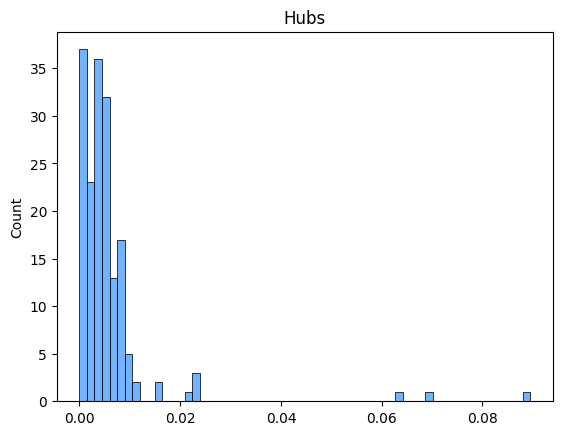

In [49]:
#plotting the page rank on a graph
#display(hubs.sort_values())

sns.histplot(hubs, color='#4499FF')
ax.set_ylim(0)
plt.title('Hubs')

34        -1.181910e-19
144       -1.069014e-19
72        -6.744804e-20
135       -5.229094e-20
81        -4.019797e-20
               ...     
119        1.435089e-02
12         1.479633e-02
Ares       1.490360e-02
Athena     1.621741e-02
Granite    2.089477e-02
Length: 174, dtype: float64

Text(0.5, 1.0, 'Authority')

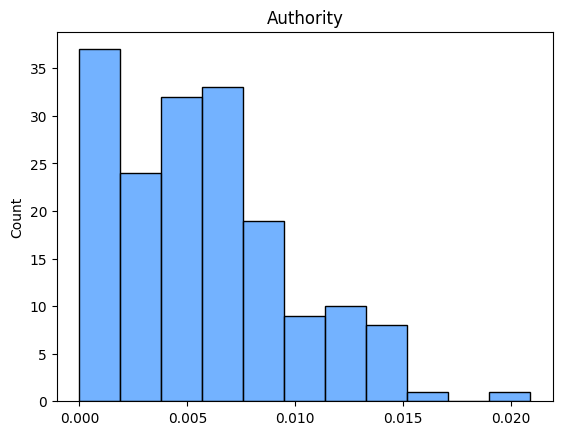

In [50]:
#plotting the authority on a graph
display(authority.sort_values())
sns.histplot(authority,  color='#4499FF')
ax.set_ylim(0)
plt.title('Authority')

(-1.0412728373515419,
 1.0972034684453116,
 -1.0867052308352818,
 1.1386170786211984)

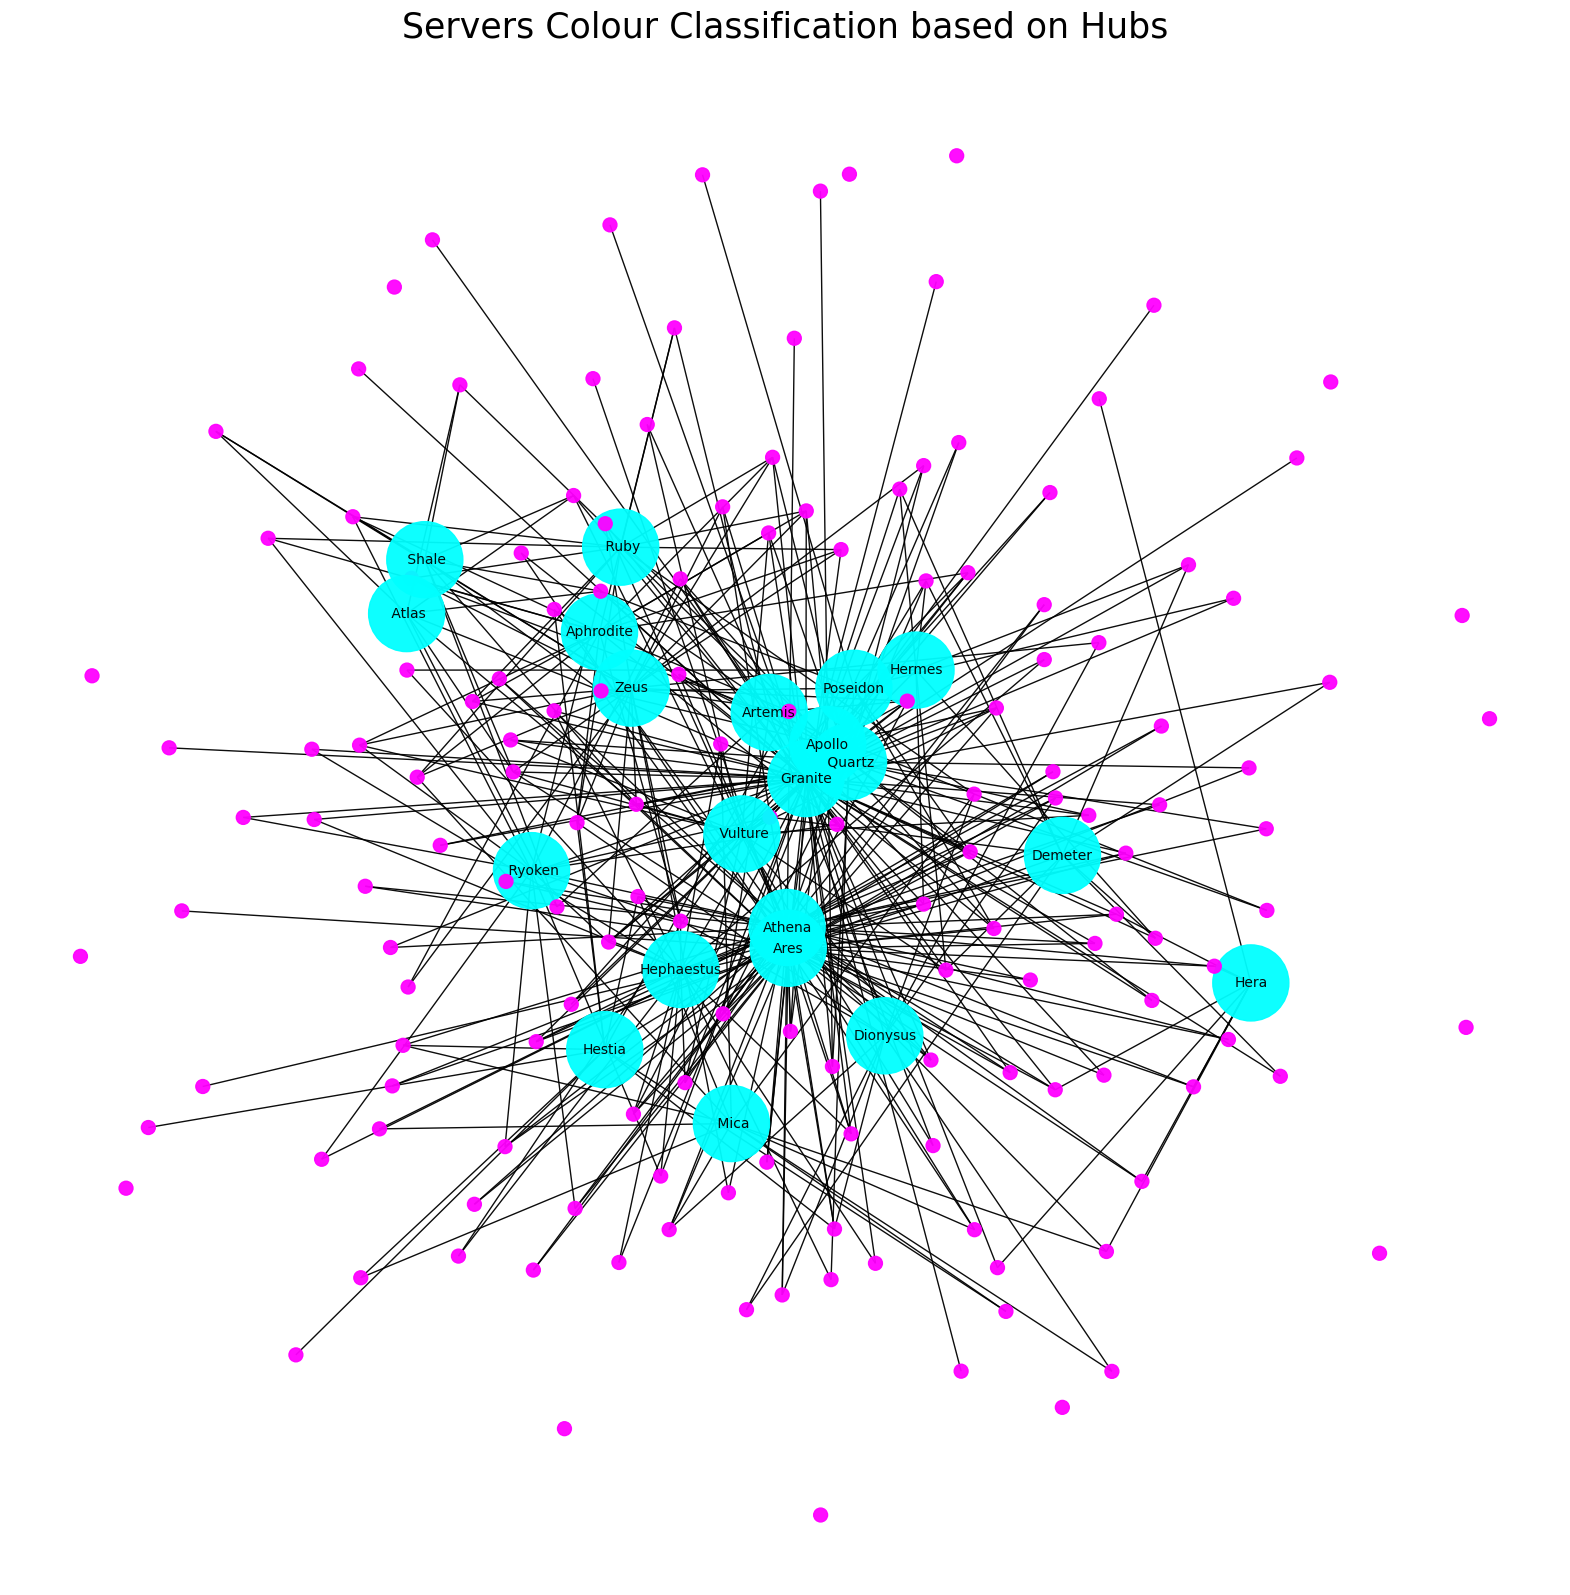

In [51]:
#the nodes that are not connected are the nodes that have 0 connections
pos = nx.spring_layout(G2,k=0.5)

authority_servers = G2.subgraph(authority.index)
hubs_servers = G2.subgraph(hubs.index)

node_size = pd.Series(nx.get_node_attributes(authority_servers, 'authority'), dtype=float)
edge_weight = pd.Series(nx.get_edge_attributes(hubs_servers, 'weight'), dtype=float)

node_color =[]
node_size = []
labels={}
for node in hubs_servers:
    if type(node) == str:
        node_color.append('cyan')
        node_size.append(3000)
        labels[node]=node
    else: 
        node_color.append('magenta')  
        node_size.append(100)  


# node_size =  [100*G2.degree(v)for v in G2]
plt.figure(figsize=(20,20))

nx.draw_networkx(G2,  labels=labels, node_size = node_size, pos=pos, node_color=node_color, cmap=plt.cm.tab10, font_size=10, width=edge_weight, alpha=.95)


plt.title(label = 'Servers Colour Classification based on Hubs', fontsize = 25)
plt.axis('off')

(-1.20554145563948, 1.1630791283964317, -1.180615977061941, 1.1841887053736373)

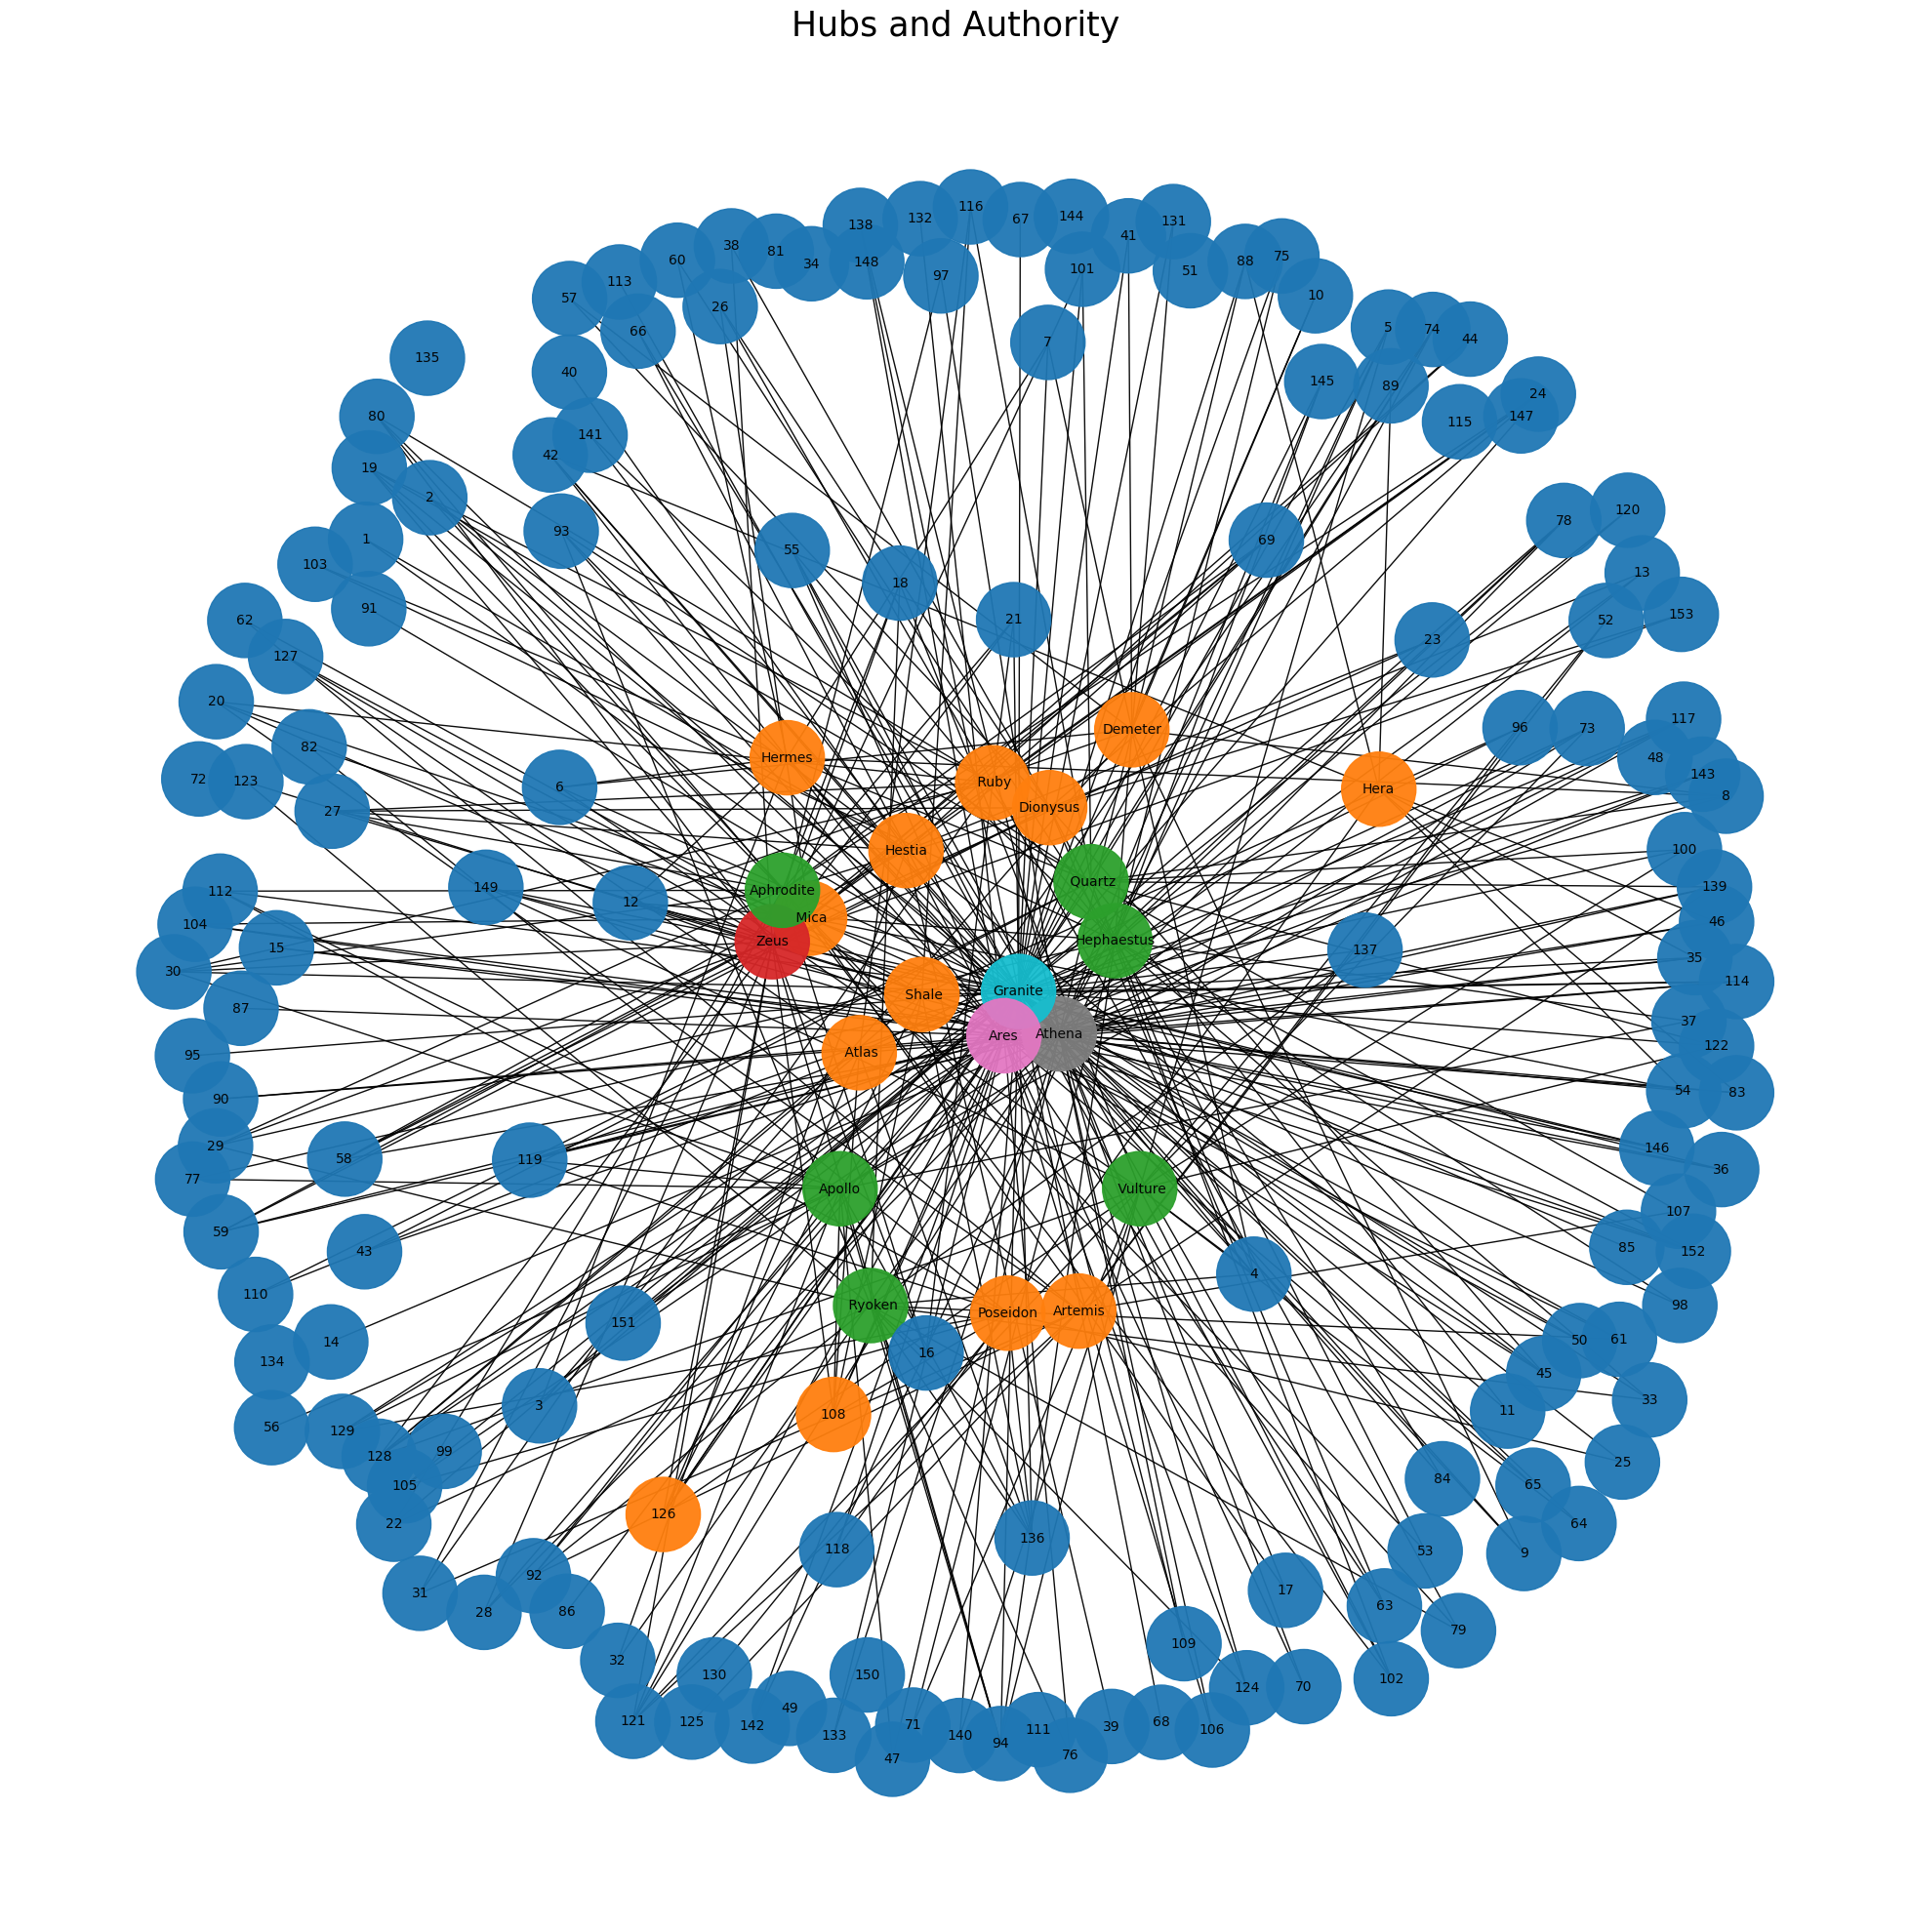

In [52]:
###hubs and authority visualisation

hubs_servers = G2.subgraph(authority.index)


node_size = pd.Series(nx.get_node_attributes(hubs_servers, 'authority'), dtype=float)
edge_weight = pd.Series(nx.get_edge_attributes(hubs_servers, 'weight'), dtype=float)

node_size = (node_size * 50) ** 2 * scale * 300 
edge_weight = edge_weight 
node_color_values = [G2.degree(v) for v in G2] 
plt.figure(figsize=(25,25))

pos = nx.spring_layout(hubs_servers, weight='weight', k =1.0)

nx.draw_networkx(hubs_servers, node_size = 3000, pos=pos, node_color=node_color_values, cmap=plt.cm.tab10, font_size=10, width=edge_weight, alpha=.95)


plt.title(label = 'Hubs and Authority', fontsize = 25)
plt.axis('off')